<h1><u><center> Economic Scenario Generator Project - Projet DDEFI </center></u></h1>
<center><img src = "https://www.econostrum.info/photo/art/grande/36648656-32651177.jpg?v=1566465679" 
     title = "NASDAQ Logo" alt = "Nasdaq Logo" width="300"><center>

<h3><center> Simon Evanno  / Viviane Feng / Basile Hogenmuller / Khaoula Lamtouni / Basma Bazi </center></h3>

<h4><center> - </h4></center>
<h4><center> École Centrale Marseille </h4></center>

# Import

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import random
from timeseries import TimeSeries

Generate data done


In [2]:
path_data = 'datas/'
exchange_rates_path = 'exchange_rates_ecb_eur_updated_2023.csv'

dftaux = pd.read_csv(filepath_or_buffer = path_data + exchange_rates_path, 
                     sep = '\t')

# Initialisation of the multi timeseries

For our analysis, we take 4 currencies:
- USD
- JPY
- GBP
- CHF

In [3]:
symbols = ['USD', 'JPY', 'GBP', 'CAD']

random.seed(14021999)

ts = TimeSeries(dftaux, symbols)
ts.pre_processing(method_return='logarithmic')

# Analysis of the timeseries

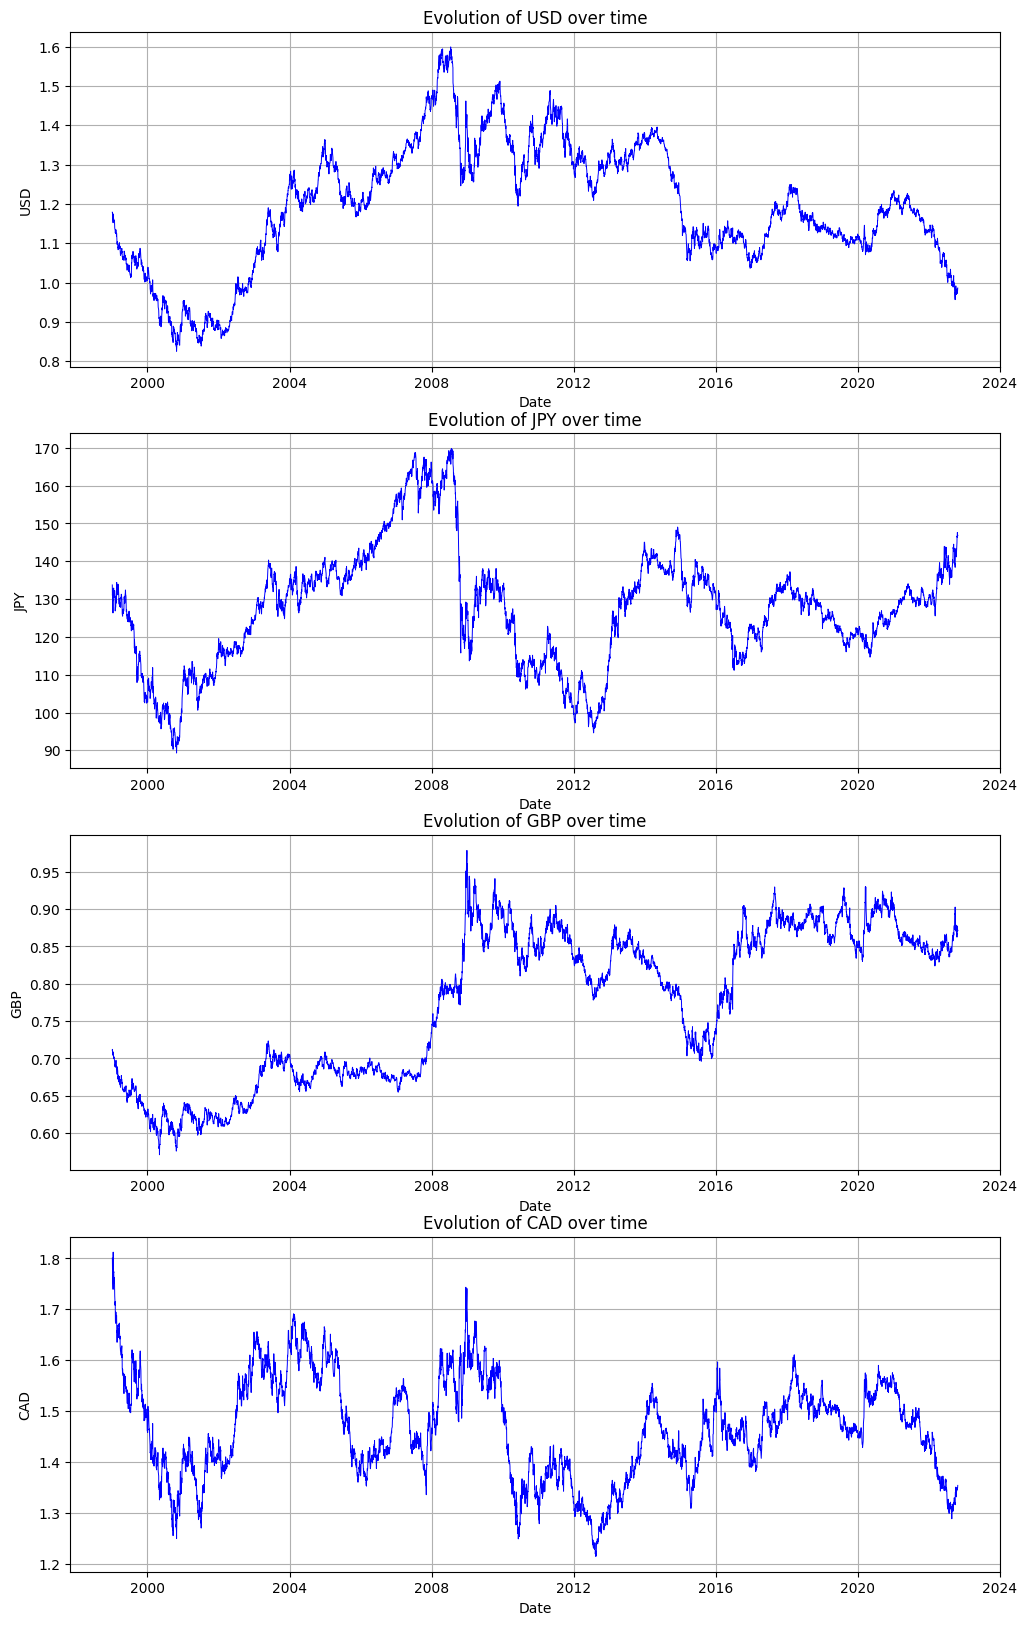

In [15]:
ts.plot(type_plot='rates')

On this plots we can see the evolution of the exchange rate between EUR-USD, EUR-JPY, EUR-GBP, EUR-CHF.

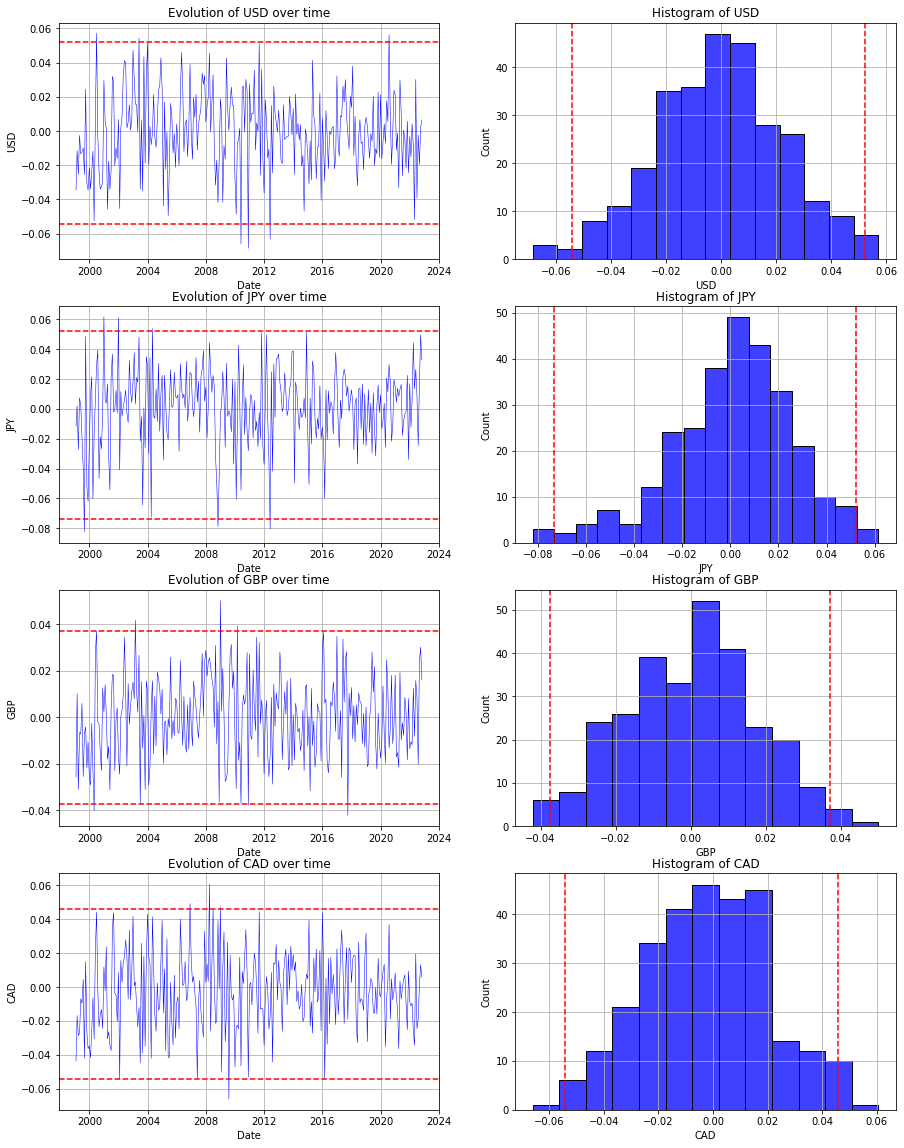

In [28]:
ts.plot(type_plot='returns', frequency="monthly")


On these graphs we can see the evolution of exchange rate returns as well as the 95% quantiles plotted in red. Moreover, we notice that the returns are similar to a normal law with all an average close to 0.

In [29]:
ts.statistics()

USD       JPY       GBP       CAD
Skewness      -0.01885 -0.145316  0.080361  0.041822
Kurtosis      3.166715  3.565273  3.276125  3.253847
Normality         True     False     False     False
Stationarity      True      True      True      True

stationarity -> bootstrap

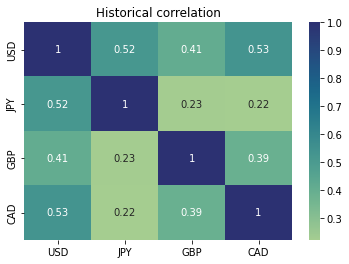

In [30]:
ts.correlation()


On this correlation matrix, we notice that some exchange rates are more correlated than others. For example EUR-USD and EUR-JPY have a correlation equal to 0.52 while EUR-USD and EUR-CHF have a correlation equal to 0.14. This matrix will allow us to see if our economic scenario generators maintain this correlation between exchange rates.

# Bootstrap method

## Explanation

Statistics science is based on learning from data. Statistical methods are therefore essential to make decisions and predictions while the situation already occured.
The traditional approach (or large sample approach) consists of drawing one sample of size n from the data and that sample is used to calculate the data estimated to make inferences on. But this method tends to take into account outliers.
In order to tackle this issue, the bootstrapping method is a statistical procedure that resamples a single data to create many simulated samples. In our case, we are considering the past datas of each currency and we draw randomly as many as returns we need for each scenarios (for example : 100).

The block samples are chosen randomly to create bootstrap resamples, there are several ways to choose these blocks :
- Simple block bootstrap: we choose from blocks of a fixed length, delta_block.
- Moving block bootstrap: slightly more complicated since it allows to overlap of the blocks.

## Daily frequency

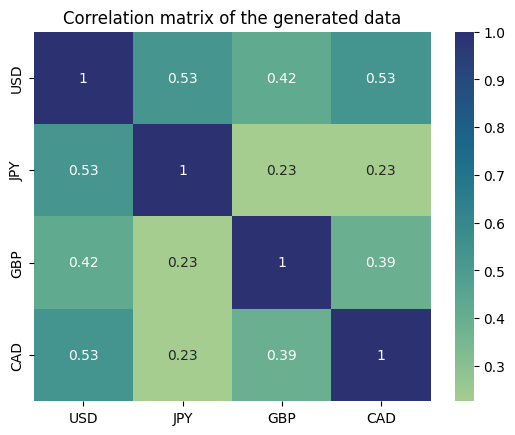

Correlation done
Quantiles done


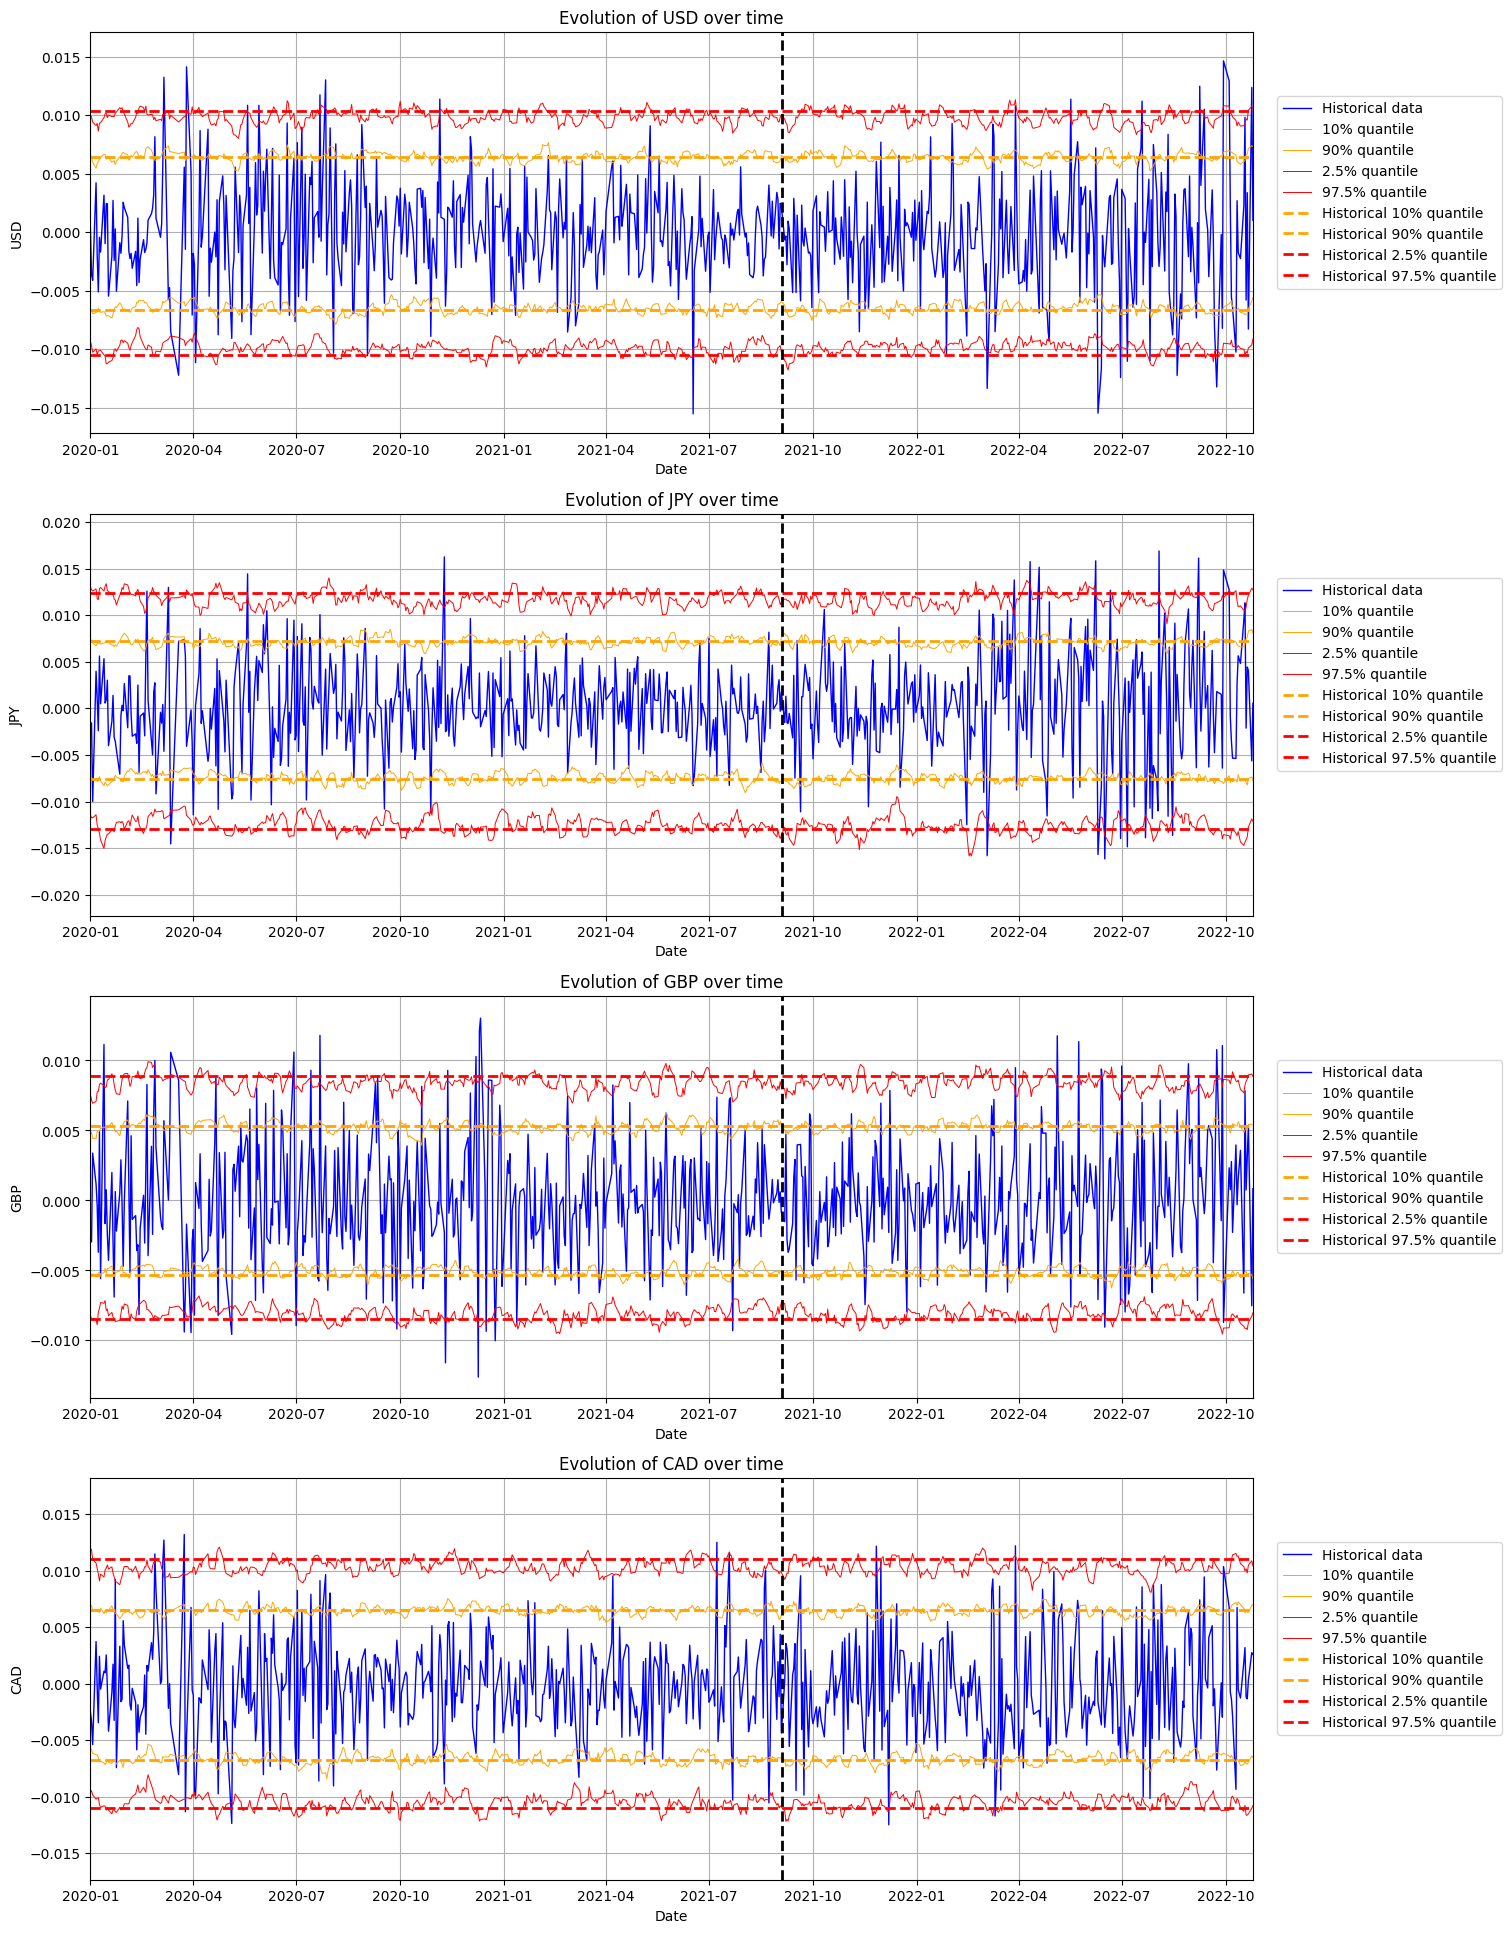

         Bootstrap
train     0.038914
generate  0.066559


In [21]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from)

## Weekly frequency

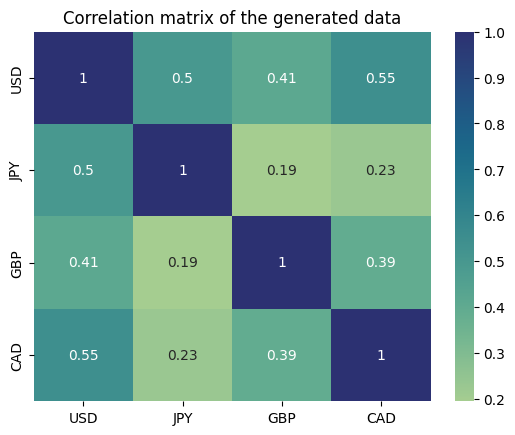

Correlation done
Quantiles done


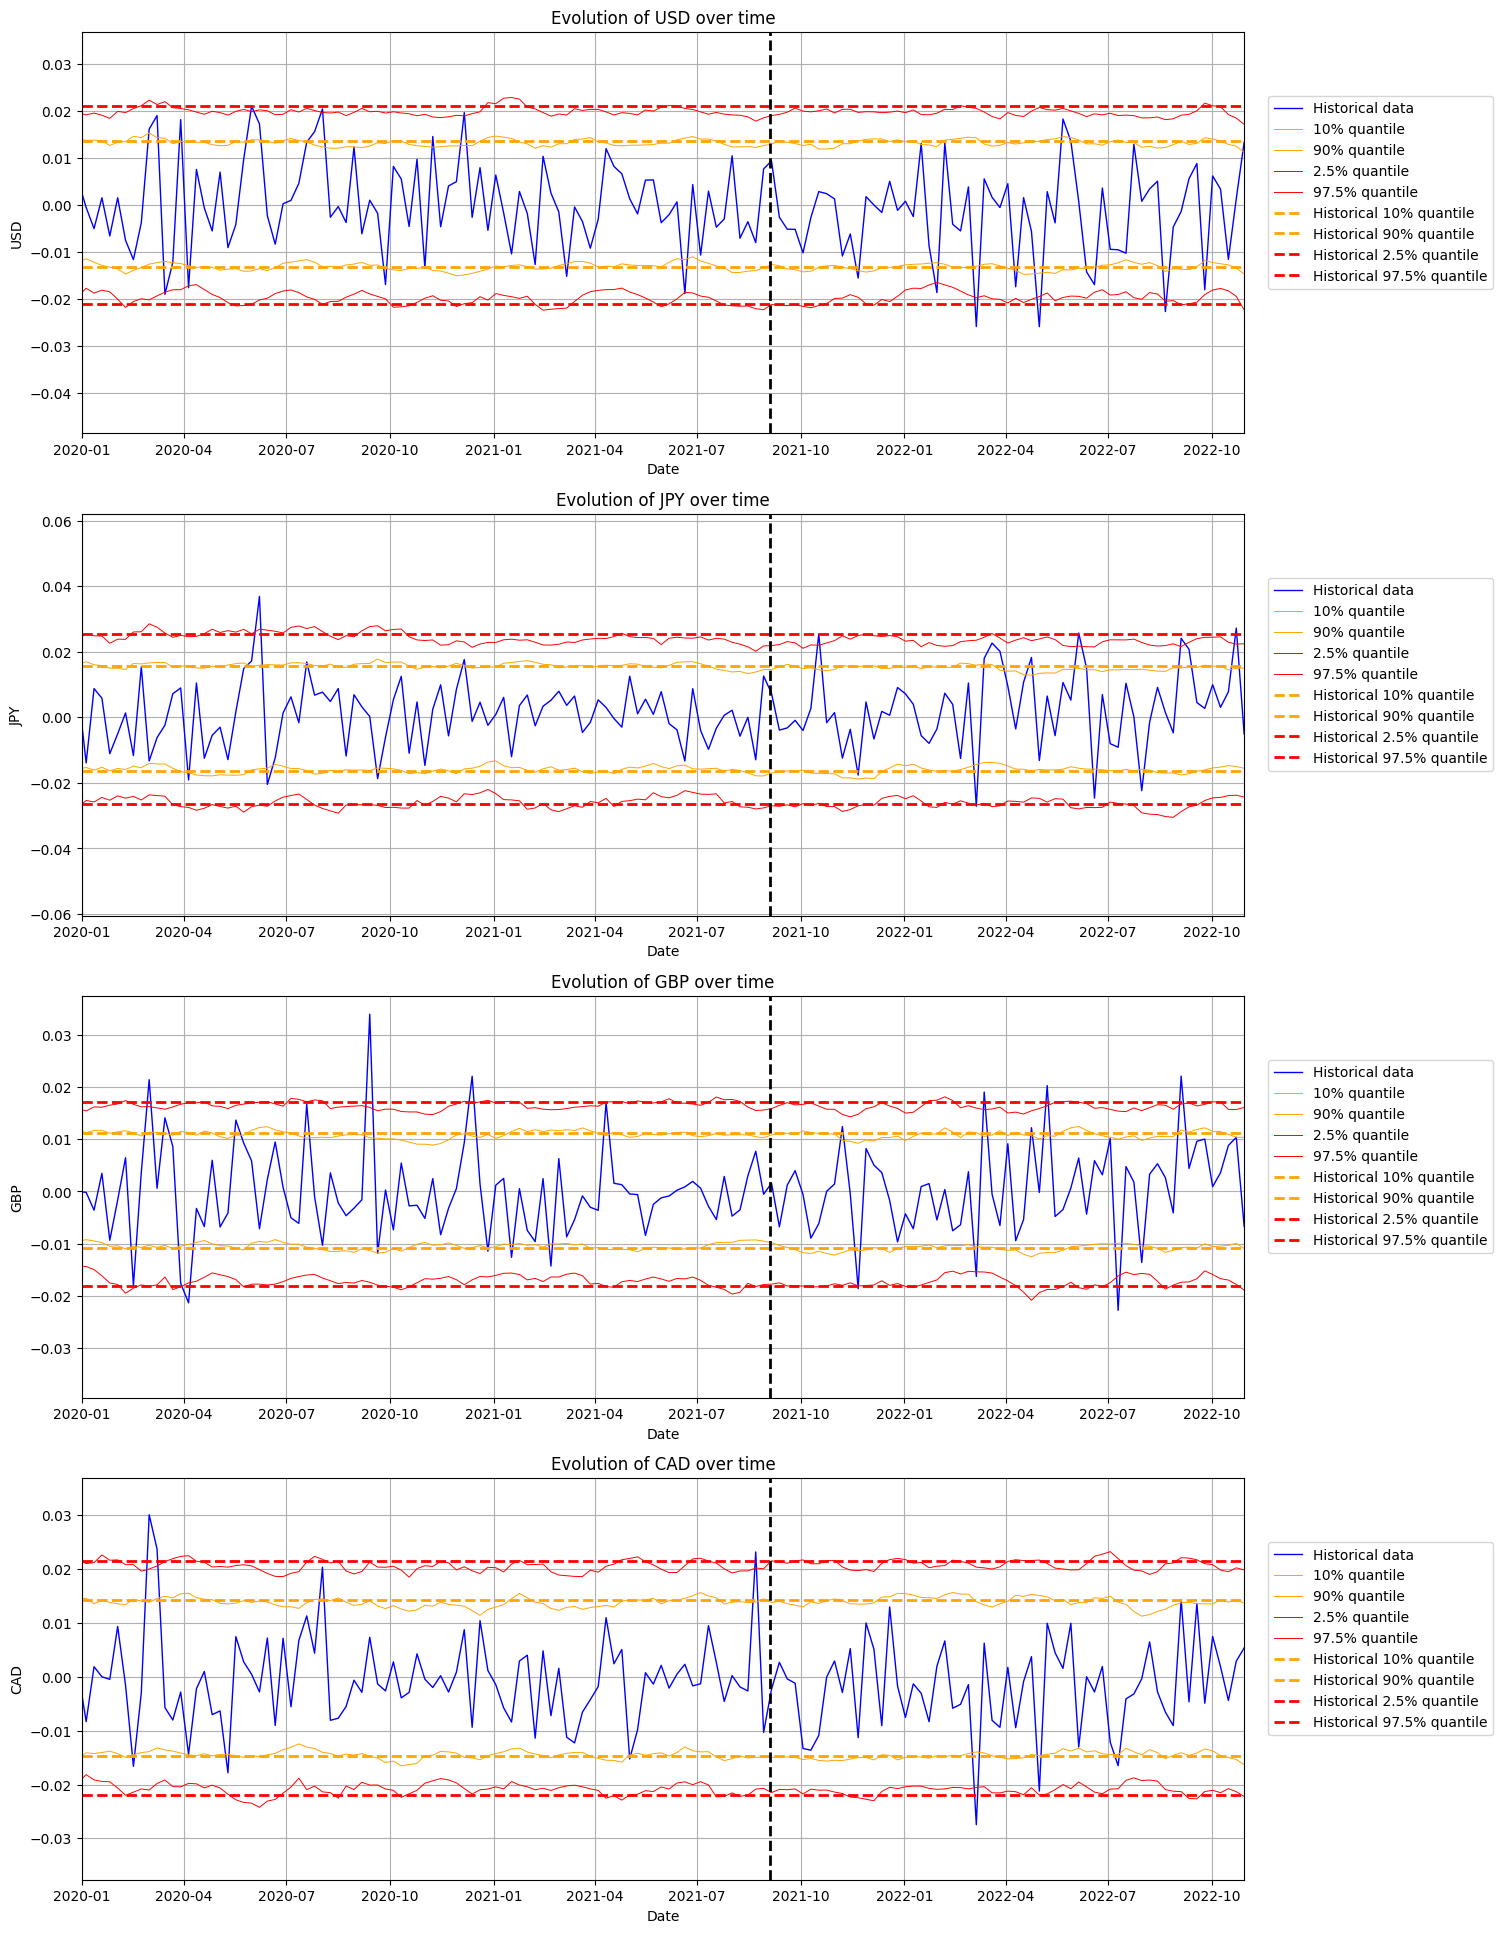

         Bootstrap
train     0.025691
generate   0.05437


In [22]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'weekly'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

## Monthly frequency

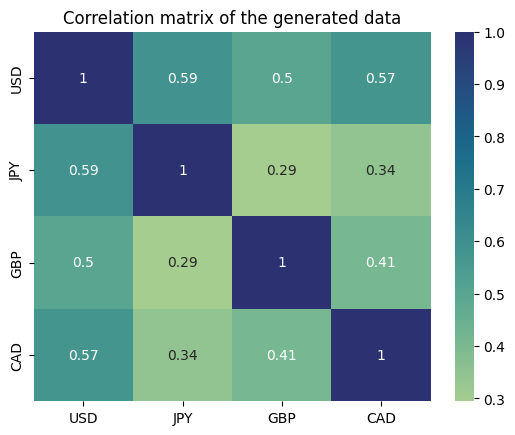

Correlation done
Quantiles done


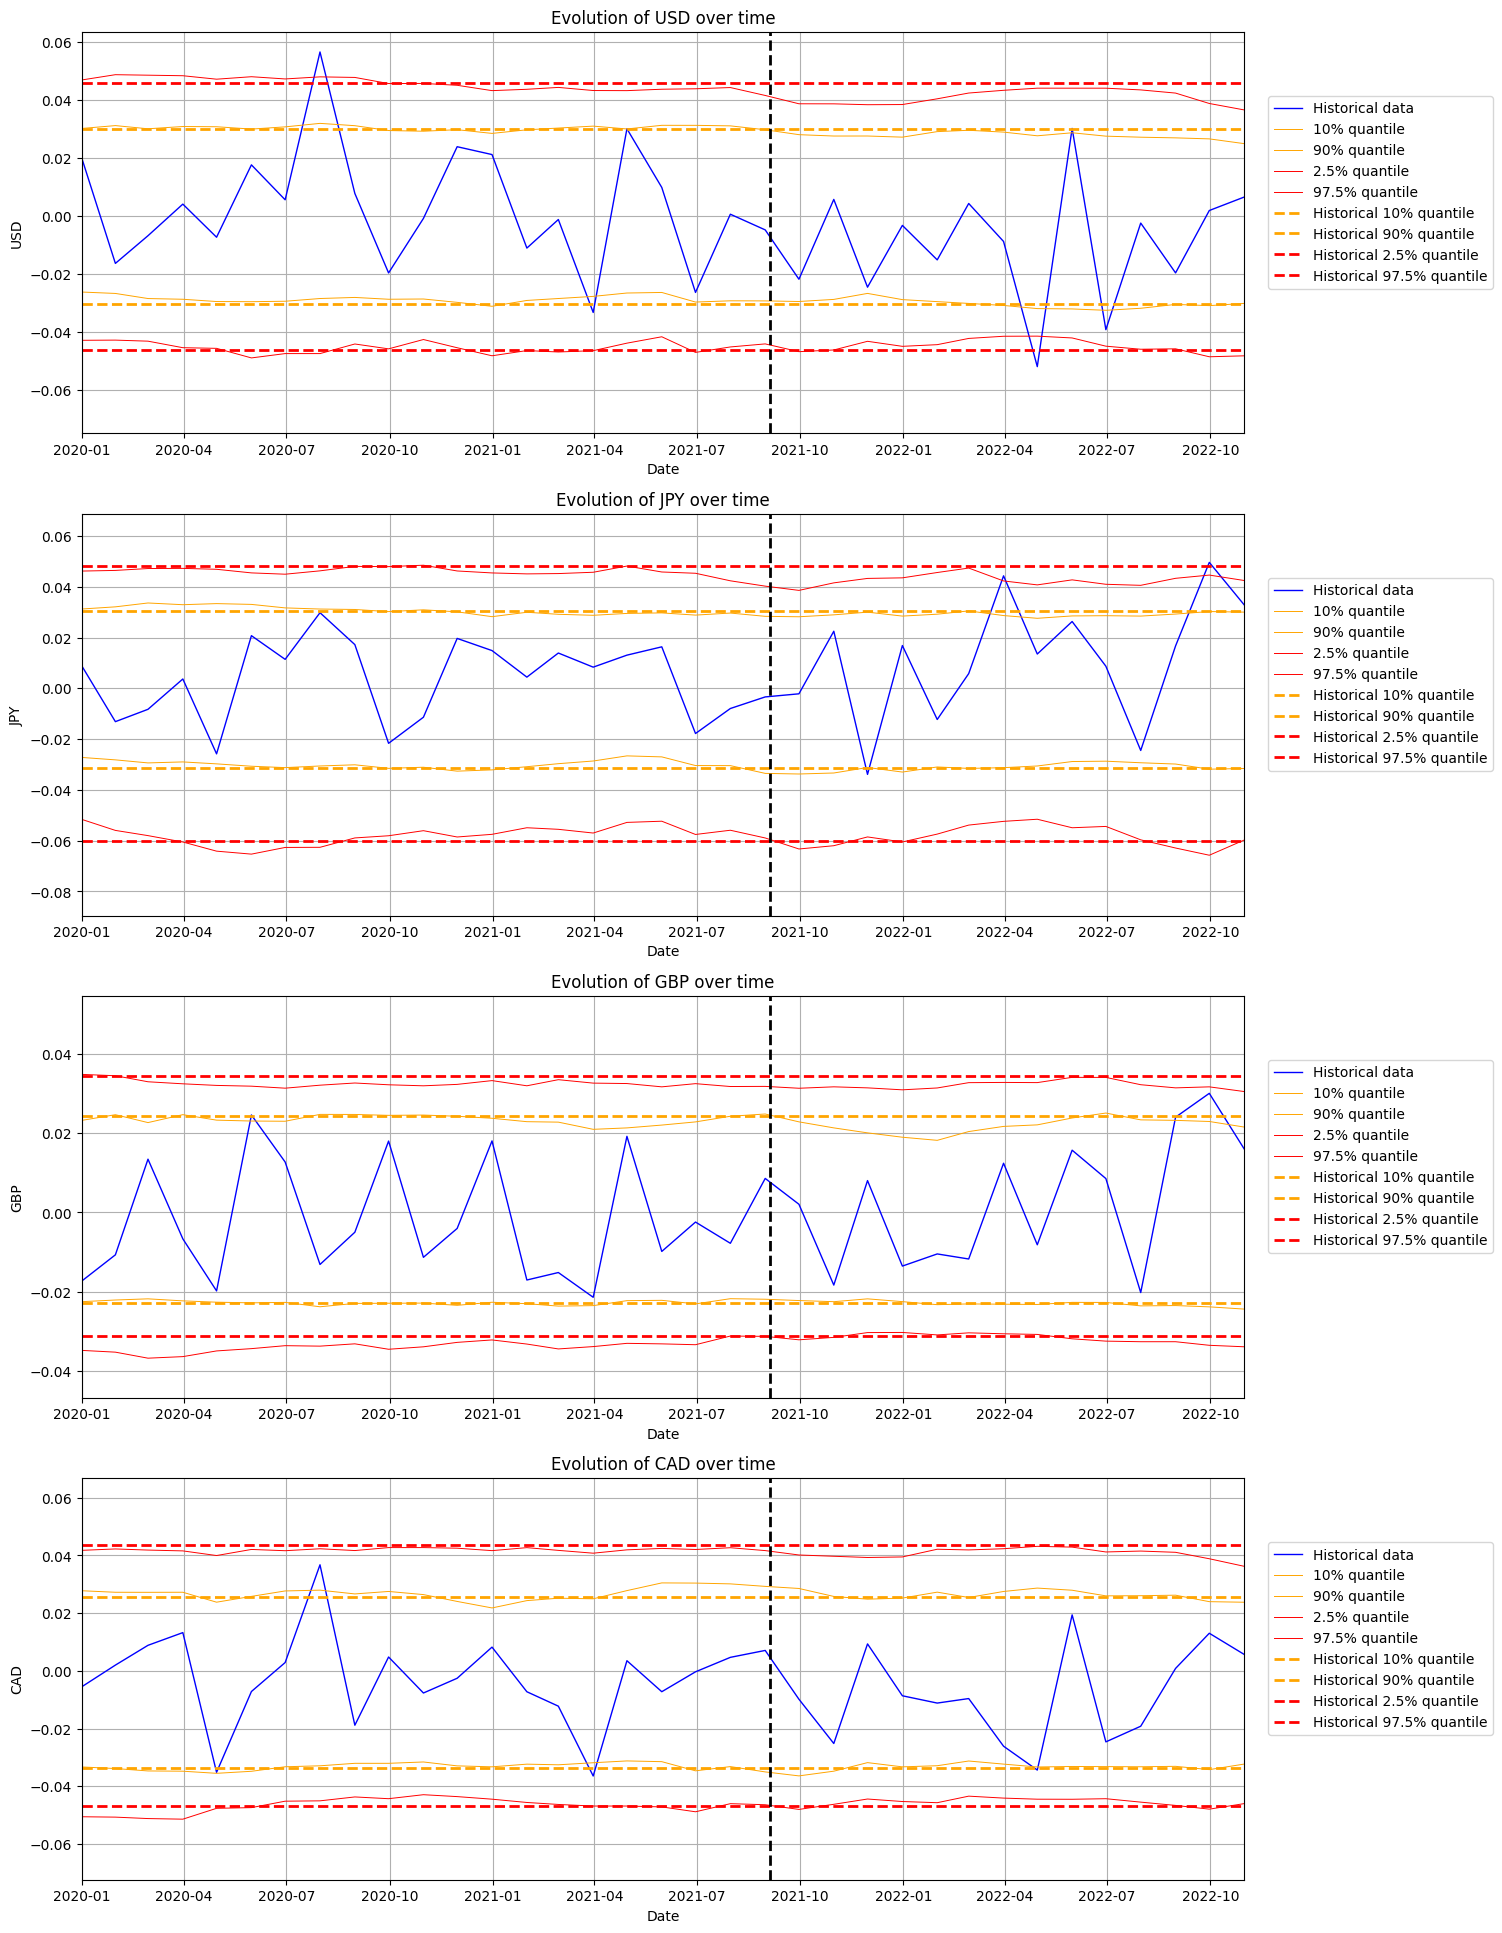

         Bootstrap
train     0.023403
generate  0.048742


In [4]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'monthly'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

## Annual frequency

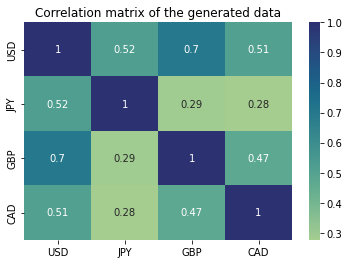

Correlation done
Quantiles done


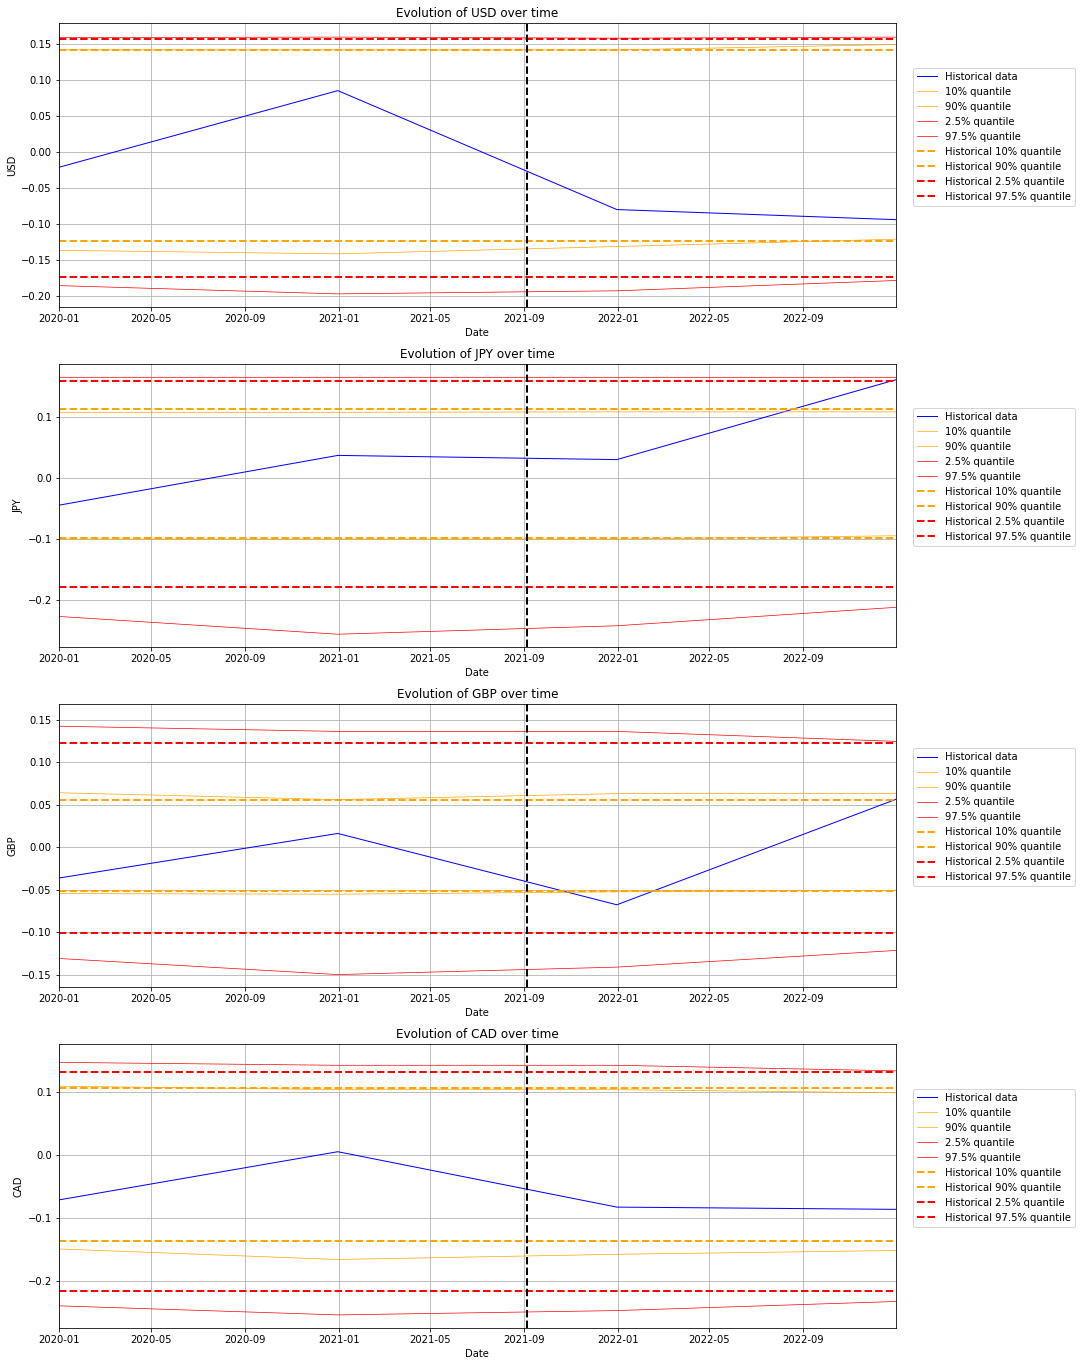

In [35]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'annualy'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

# RBM

## Explanation

A Restricted Boltzmann Machine is a two-layer network with stochastic activation units. Restricted means that there is no connection between units whithin the same layer. The layer which is exposed to the training data set is called the visible layer. Inputs from the visible layer flow through the network (forward pass) to the hidden layer. 

Each hidden unit then ”fires” randomly − its output is a Bernoulli random variable: ”1” is generated with probability p, which is equal to the sigmoid activation function value, and ”0” is generated with probability 1 − p. The outputs from the hidden layer then flow back (backward pass) to the visible layer, where they are aggregated and added to the visible layer biases.

The network learns the joint distribution of the configurations of visible and hidden activation units by trying to reconstruct the inputs from the training data set (visible unit values) by finding an optimal set of the network weights and biases

Here is a schema to visualize hidden and visible units.

![picture](https://drive.google.com/uc?id=1S5XYgEAKr2hpbdkNJJXj0R-XMST_6t3E)

Let's explain how RBM mathematicaly works :

Let's take a Bernoulli RBM with N stochastic binary visible units and M stochastic binary hidden units. $v = (v_{1}, ..., v_{N}$) and $h = (h_{1}, ..., h_{M}$) respectively, configurations of the visible and hidden units. The joint configuration of the visible and hidden units has the following energy :

$$
E(v,h) = -\sum_{i=1}^{N}a_{i}v_{i}-\sum_{j=1}^{M}b_{j}h_{j}-\sum_{i=1}^{N}\sum_{j=1}^{M}w_{i,j}v_{i}h_{j}
$$

Then we can define the joint probability :

$$
p(v,h) = \frac{1}{Z}e^{-E(v,h)}
$$

Z is defined by :

$$
Z = \sum_{v,h}e^{-E(v,h)}
$$

By using the total probability formula we obtain the probability of the visible and the hidden states:

$$
p(v) = \frac{1}{Z}\sum_{h}e^{-E(v,h)}, \qquad p(h) = \frac{1}{Z}\sum_{v}e^{-E(v,h)}
$$

The network is trained through the updates of weights and biases which increase the log probability of a training vector. We can obtain the sensitivities of the log probability of the training vector with respect to the weights and biases by computing the following expressions:

$$
\frac{\partial p(v)}{\partial w_{ij}}, \qquad \frac{\partial p(v)}{\partial a_{i}}, \qquad \frac{\partial p(v)}{\partial b_{j}}
$$

Then we obtain the weights and biases updates by the following expressions:

\begin{align*}
  \Delta w_{ij} &= \mu ( \langle v_{i}h_{j} \rangle_{data}-\langle v_{i}h_{j} \rangle_{model}), \\
  \Delta a_{i} &= \mu ( \langle v_{i} \rangle_{data}-\langle v_{i} \rangle_{model}), \\
  \Delta b_{j} &= \mu ( \langle h_{j} \rangle_{data}-\langle h_{j} \rangle_{model})
\end{align*}

With $\langle ... \rangle$ the expectation under the distribution specified by the subscript and $\mu$ the learning rate. We can get an unbiased estimator of $\langle v_{i}h_{j} \rangle_{data}$ with $\sigma (x)$ the following logistic sigmoid activation function :

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Then, the binary state $h_{j}$ of the hidden unit j is set to 1 with probability given the training vector $\textbf{v}$:

$$
p(h_{j}=1|\textbf{v}) = \sigma (b_{j}+\sum_{i=1}^{N}v_{i}w_{ij})
$$

The binary state $v_{i}$ of the visible unit i is set to 1 with probability given the hidden vector $\textbf{h}$

$$
p(v_{i}=1 | \textbf{h}) = \sigma (a_{i}+\sum_{j=1}^{M}h_{j}w_{ij})
$$

Then to implement it we will use the following encoding and unencoding algorithm :

![picture](https://drive.google.com/uc?id=1muWgQuhY8WO_czNH8RoE2eHy_RkCwI8n)

And here is the k-step contrastive divergence algorithm we used in our RBM algorithm. The learning works on a number of epochs. During all epochs, we will data sequentially. For each epoch we will browse the data by batch (10 in our case). Then each batch will be used to update k times the units of each layer. (k=1 in our case)

![picture](https://drive.google.com/uc?id=1th8acOONFpG1yOxuvZIUZEMh4ezdil_6)

## RBM simple on a mix gaussian distribution

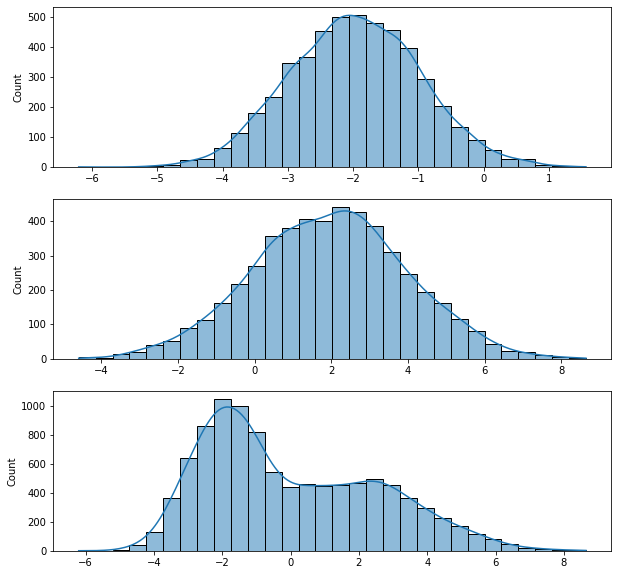

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s1 = np.random.normal(loc=-2, scale=1, size=5000)
s2 = np.random.normal(loc=2, scale=2, size=5000)
st = np.concatenate((s1,s2))
np.random.shuffle(st)
np.random.shuffle(st)
np.random.shuffle(st)

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(s1,bins=30,kde=True,ax=axes[0])
sns.histplot(s2,bins=30,kde=True,ax=axes[1])
sns.histplot(st,bins=30,kde=True,ax=axes[2])

Avec peu d'entrainemtn K=2000

Generate data done
min: -6.20633970211444, max: 8.648584511449776
mse: 1.718090510913004e-08


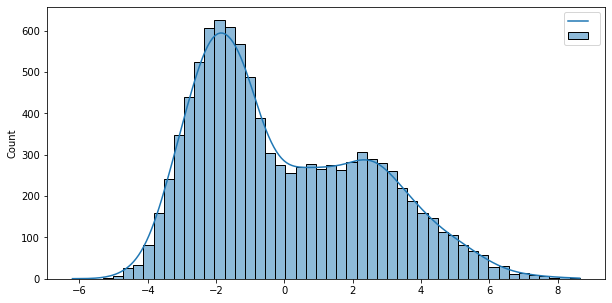

mse: 2.9752: 100%|██████████| 2000/2000 [00:17<00:00, 115.60it/s]


Training time: 18.372525215148926s


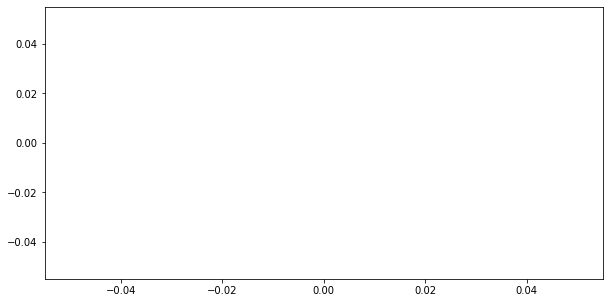

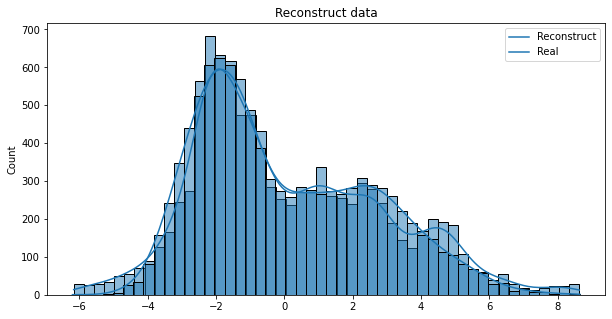

<Figure size 720x360 with 0 Axes>

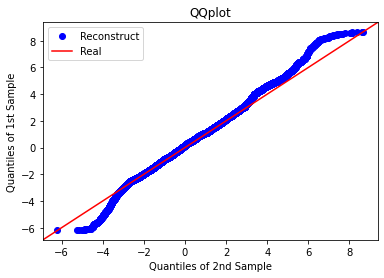

In [ ]:
from EconomicScenariosGenerator.rbm import RBM_simple
rbm = RBM_simple(st, 16, 12)
rbm.pre_processing()  
rbm.train(K=2000, batch_size=10, k_steps=1, lr=0.025, verbose=True)

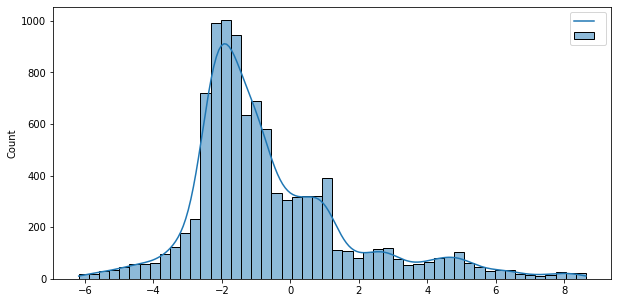

<Figure size 720x360 with 0 Axes>

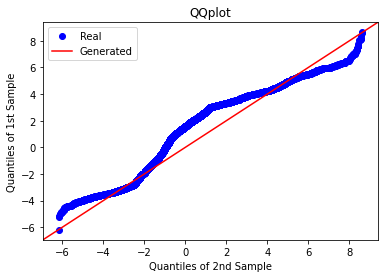

In [ ]:
rbm.generate_data(10000, 0, 1)

## RBM method

### Daily frequency

Pre-processing done


100%|██████████| 10000/10000 [02:08<00:00, 77.55it/s]


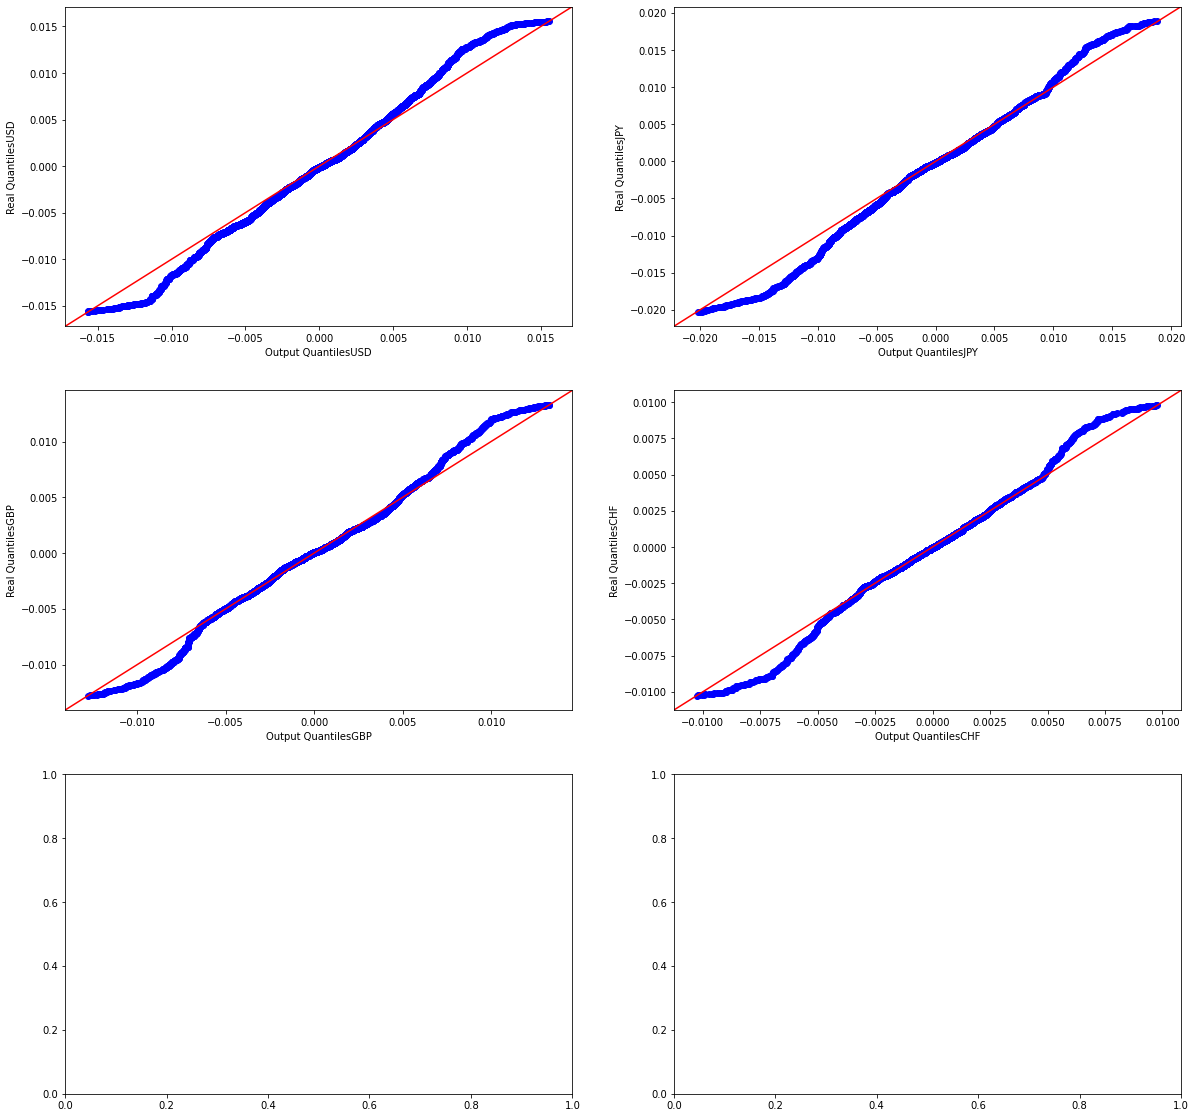

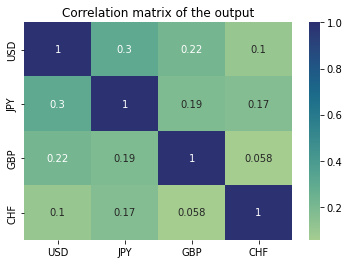

Correlation done
Train done


100%|██████████| 5728/5728 [05:26<00:00, 17.52it/s]


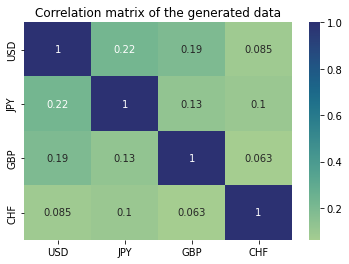

Correlation done
Quantiles done


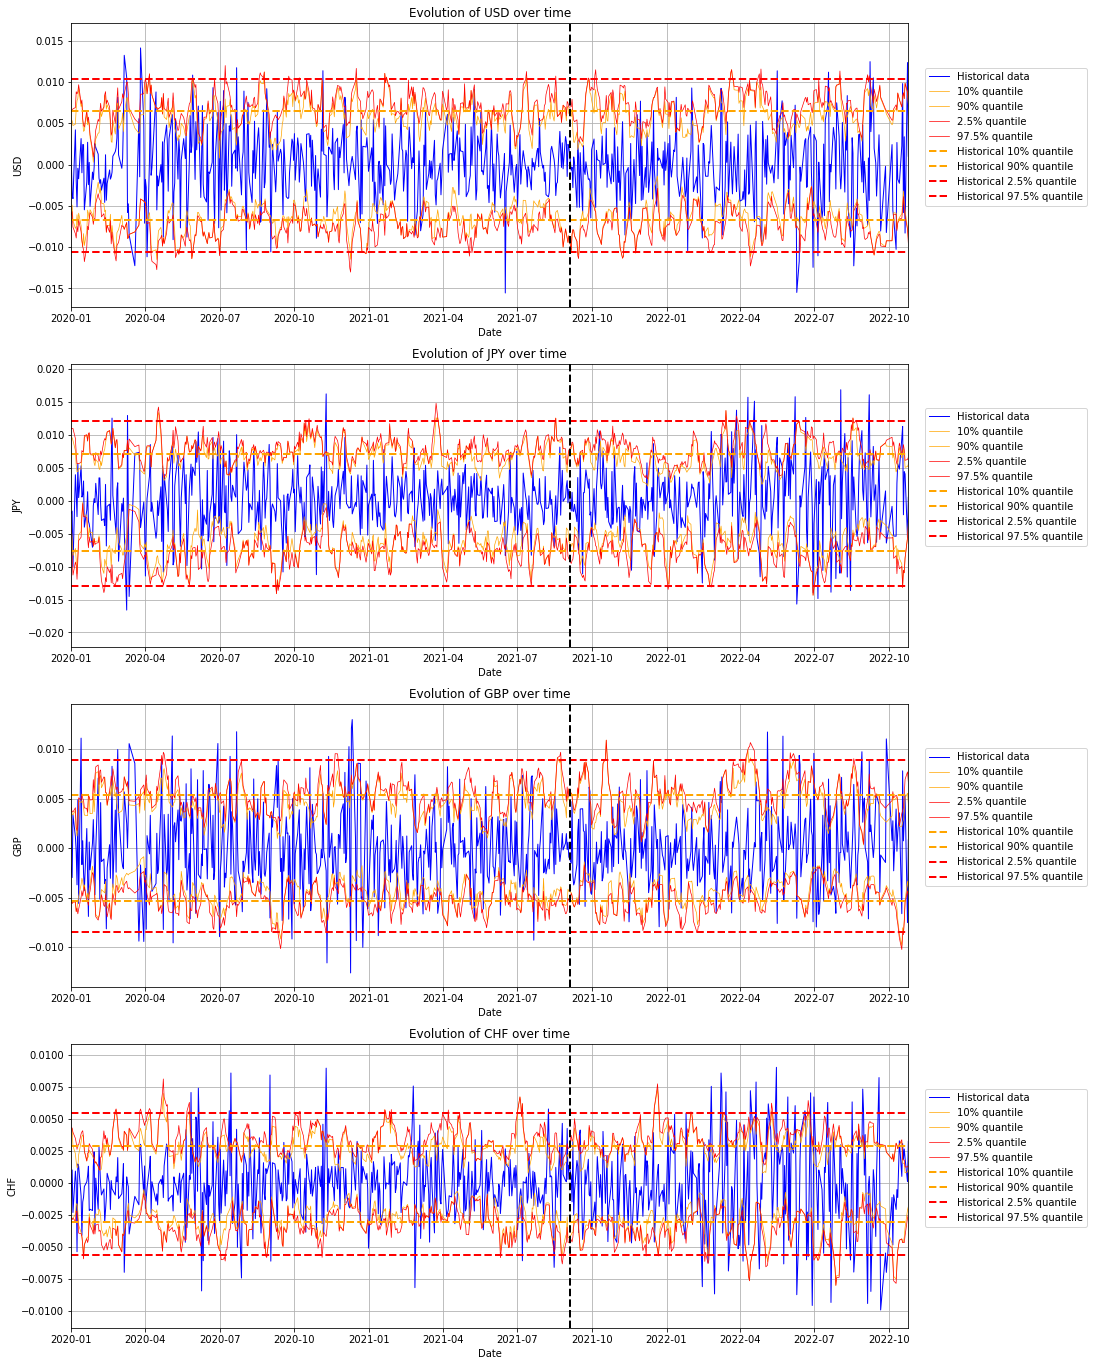

In [ ]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 10000
lr = 0.015
windows = 5
K = 150 # for the generation of sample
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, parallel=True)

### Weekly frequency

Pre-processing done


100%|██████████| 7000/7000 [00:45<00:00, 153.97it/s]


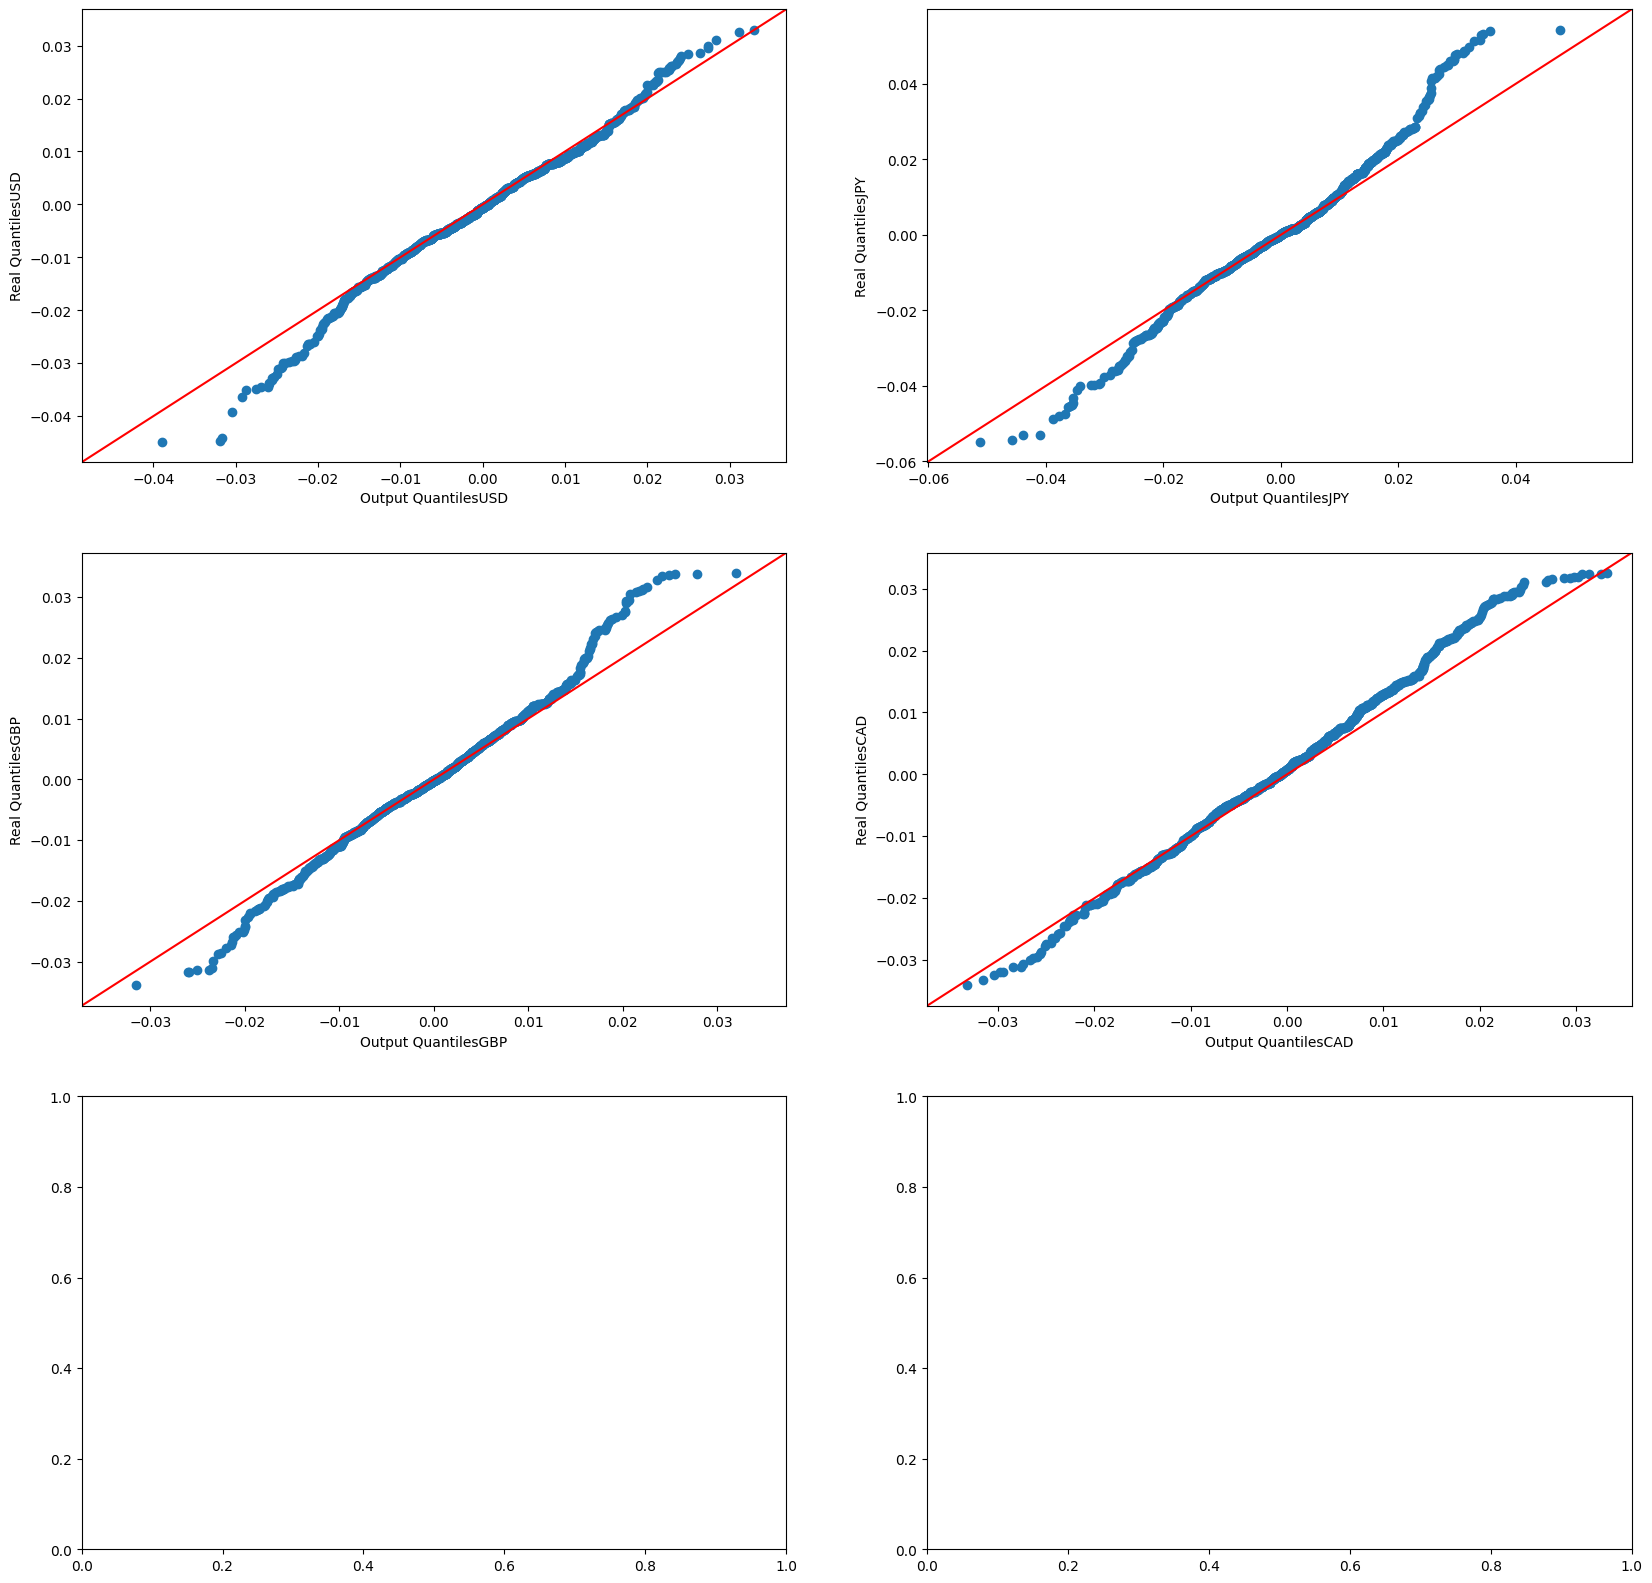

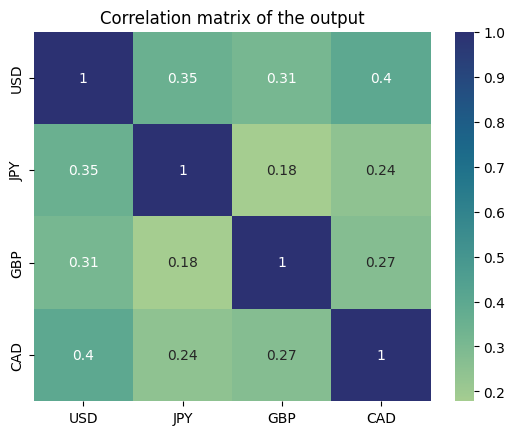

Correlation done
Train done


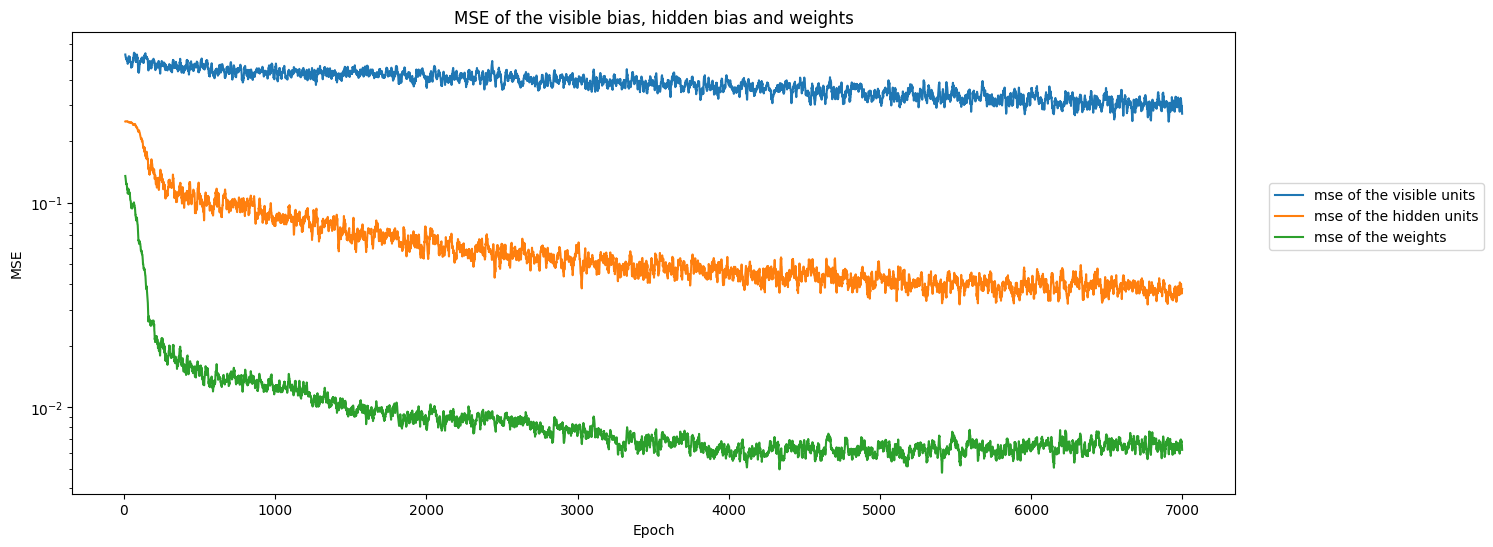

In [23]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 500 # for the generation of sample
frequency = 'weekly'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=True)

### Monthly frequency

Pre-processing done


100%|██████████| 7000/7000 [00:47<00:00, 148.88it/s]


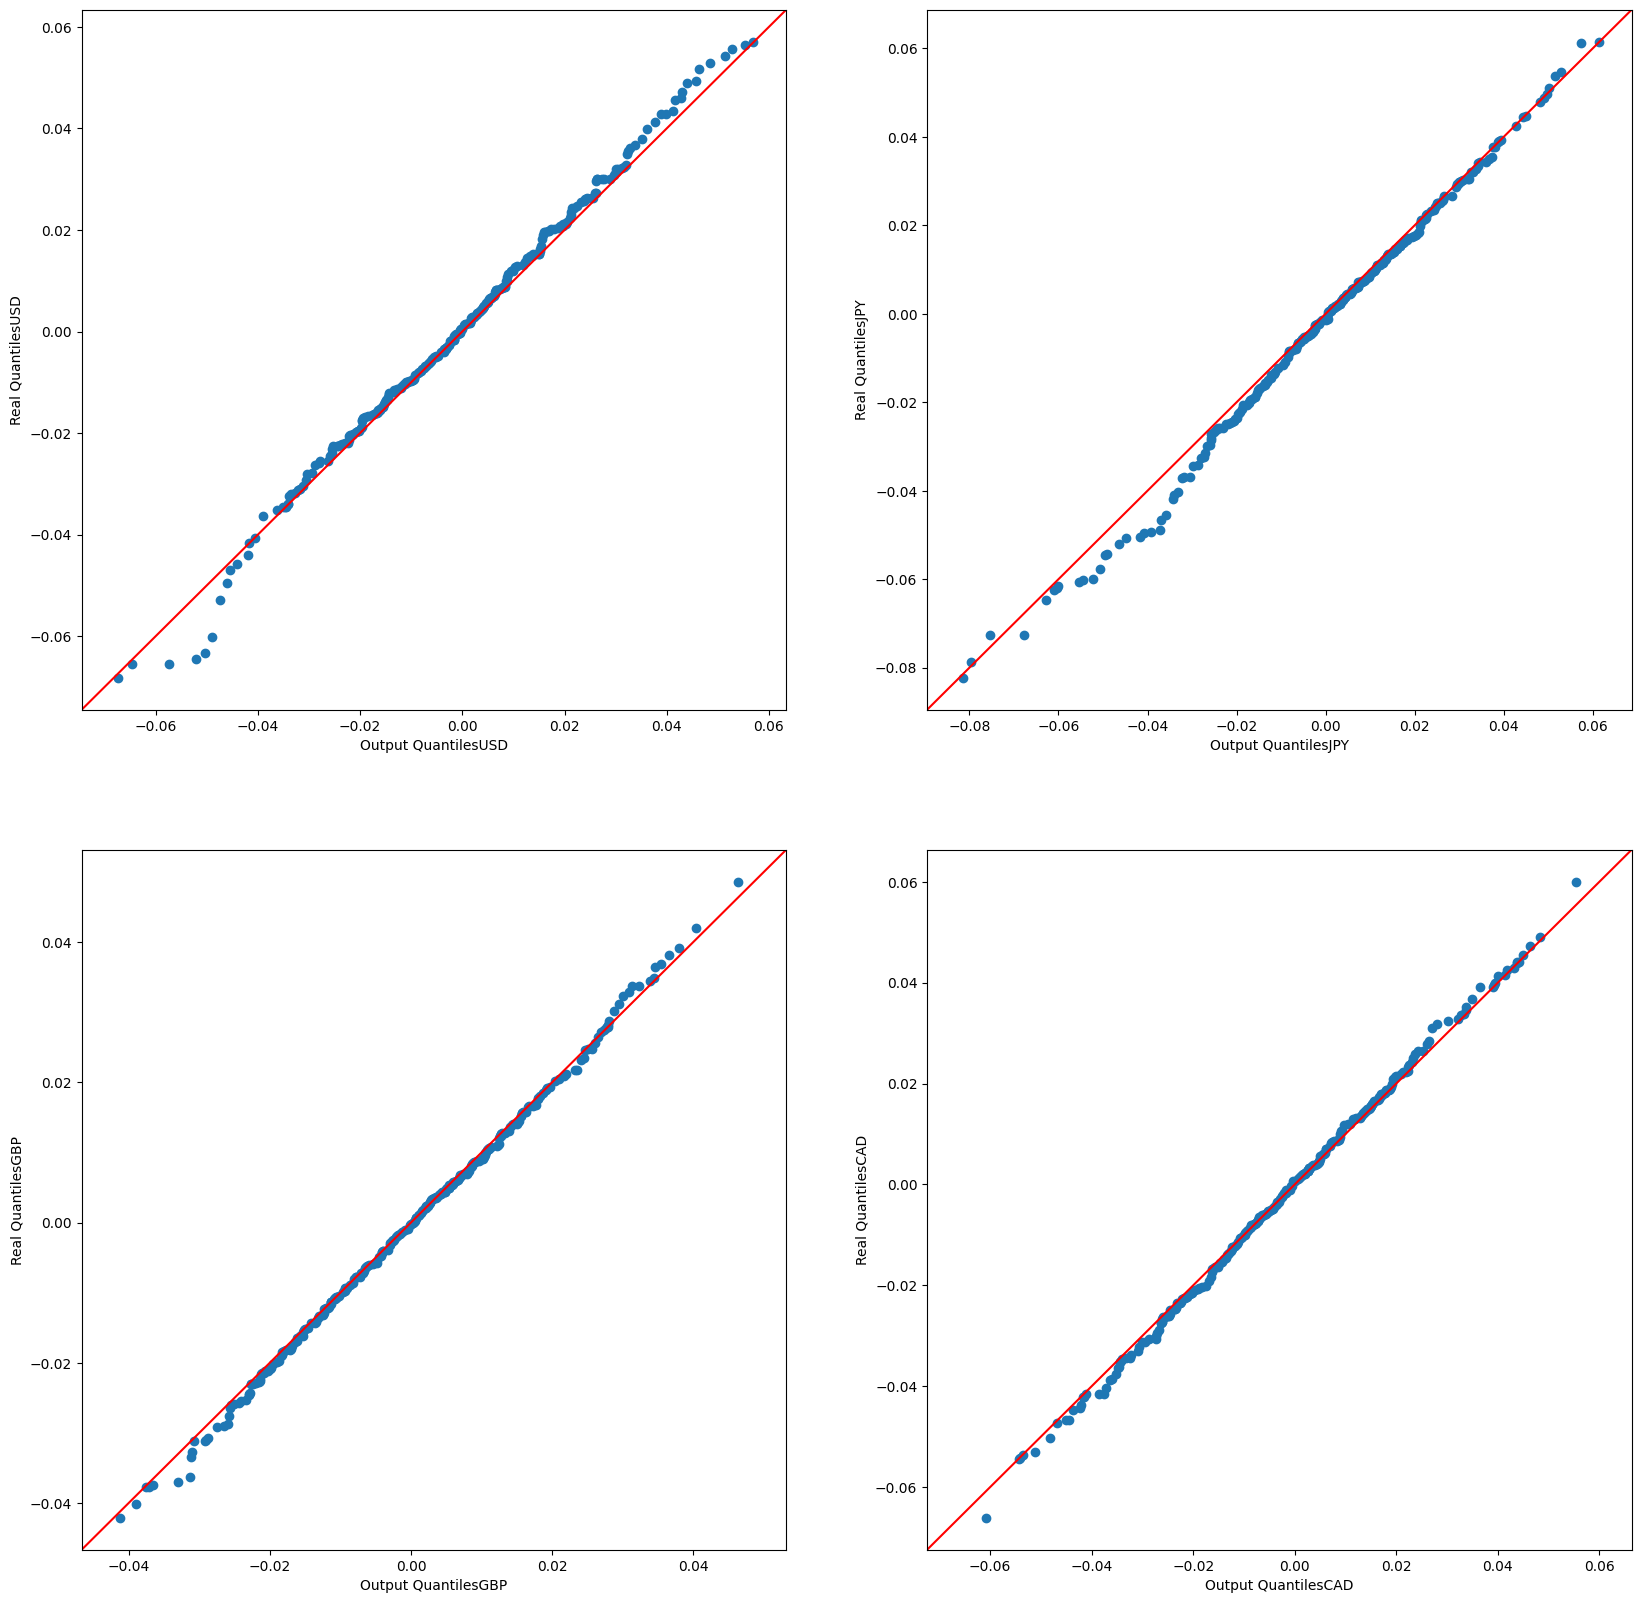

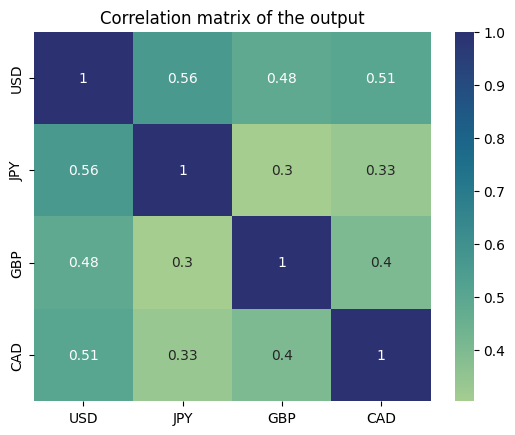

Correlation done
Train done


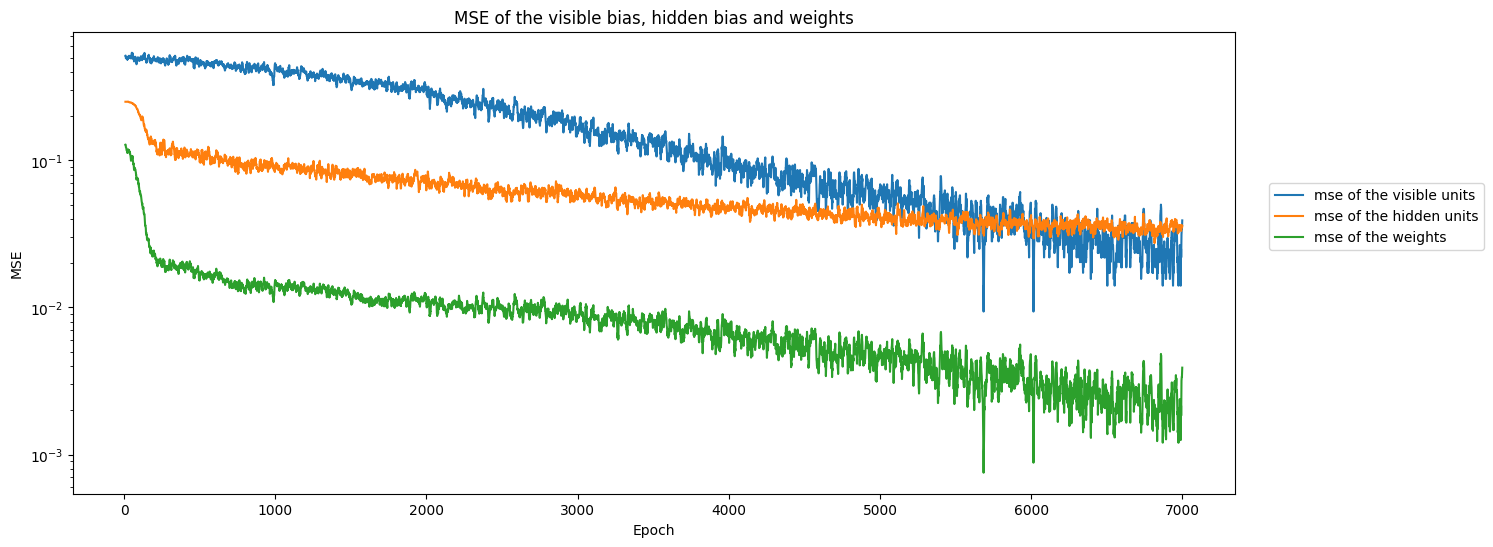

100%|██████████| 10/10 [04:43<00:00, 28.39s/it]


Time to generate the data: 283.86001420021057s


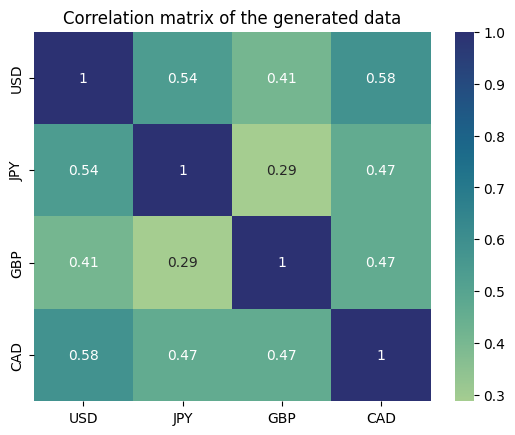

Correlation done
Quantiles done


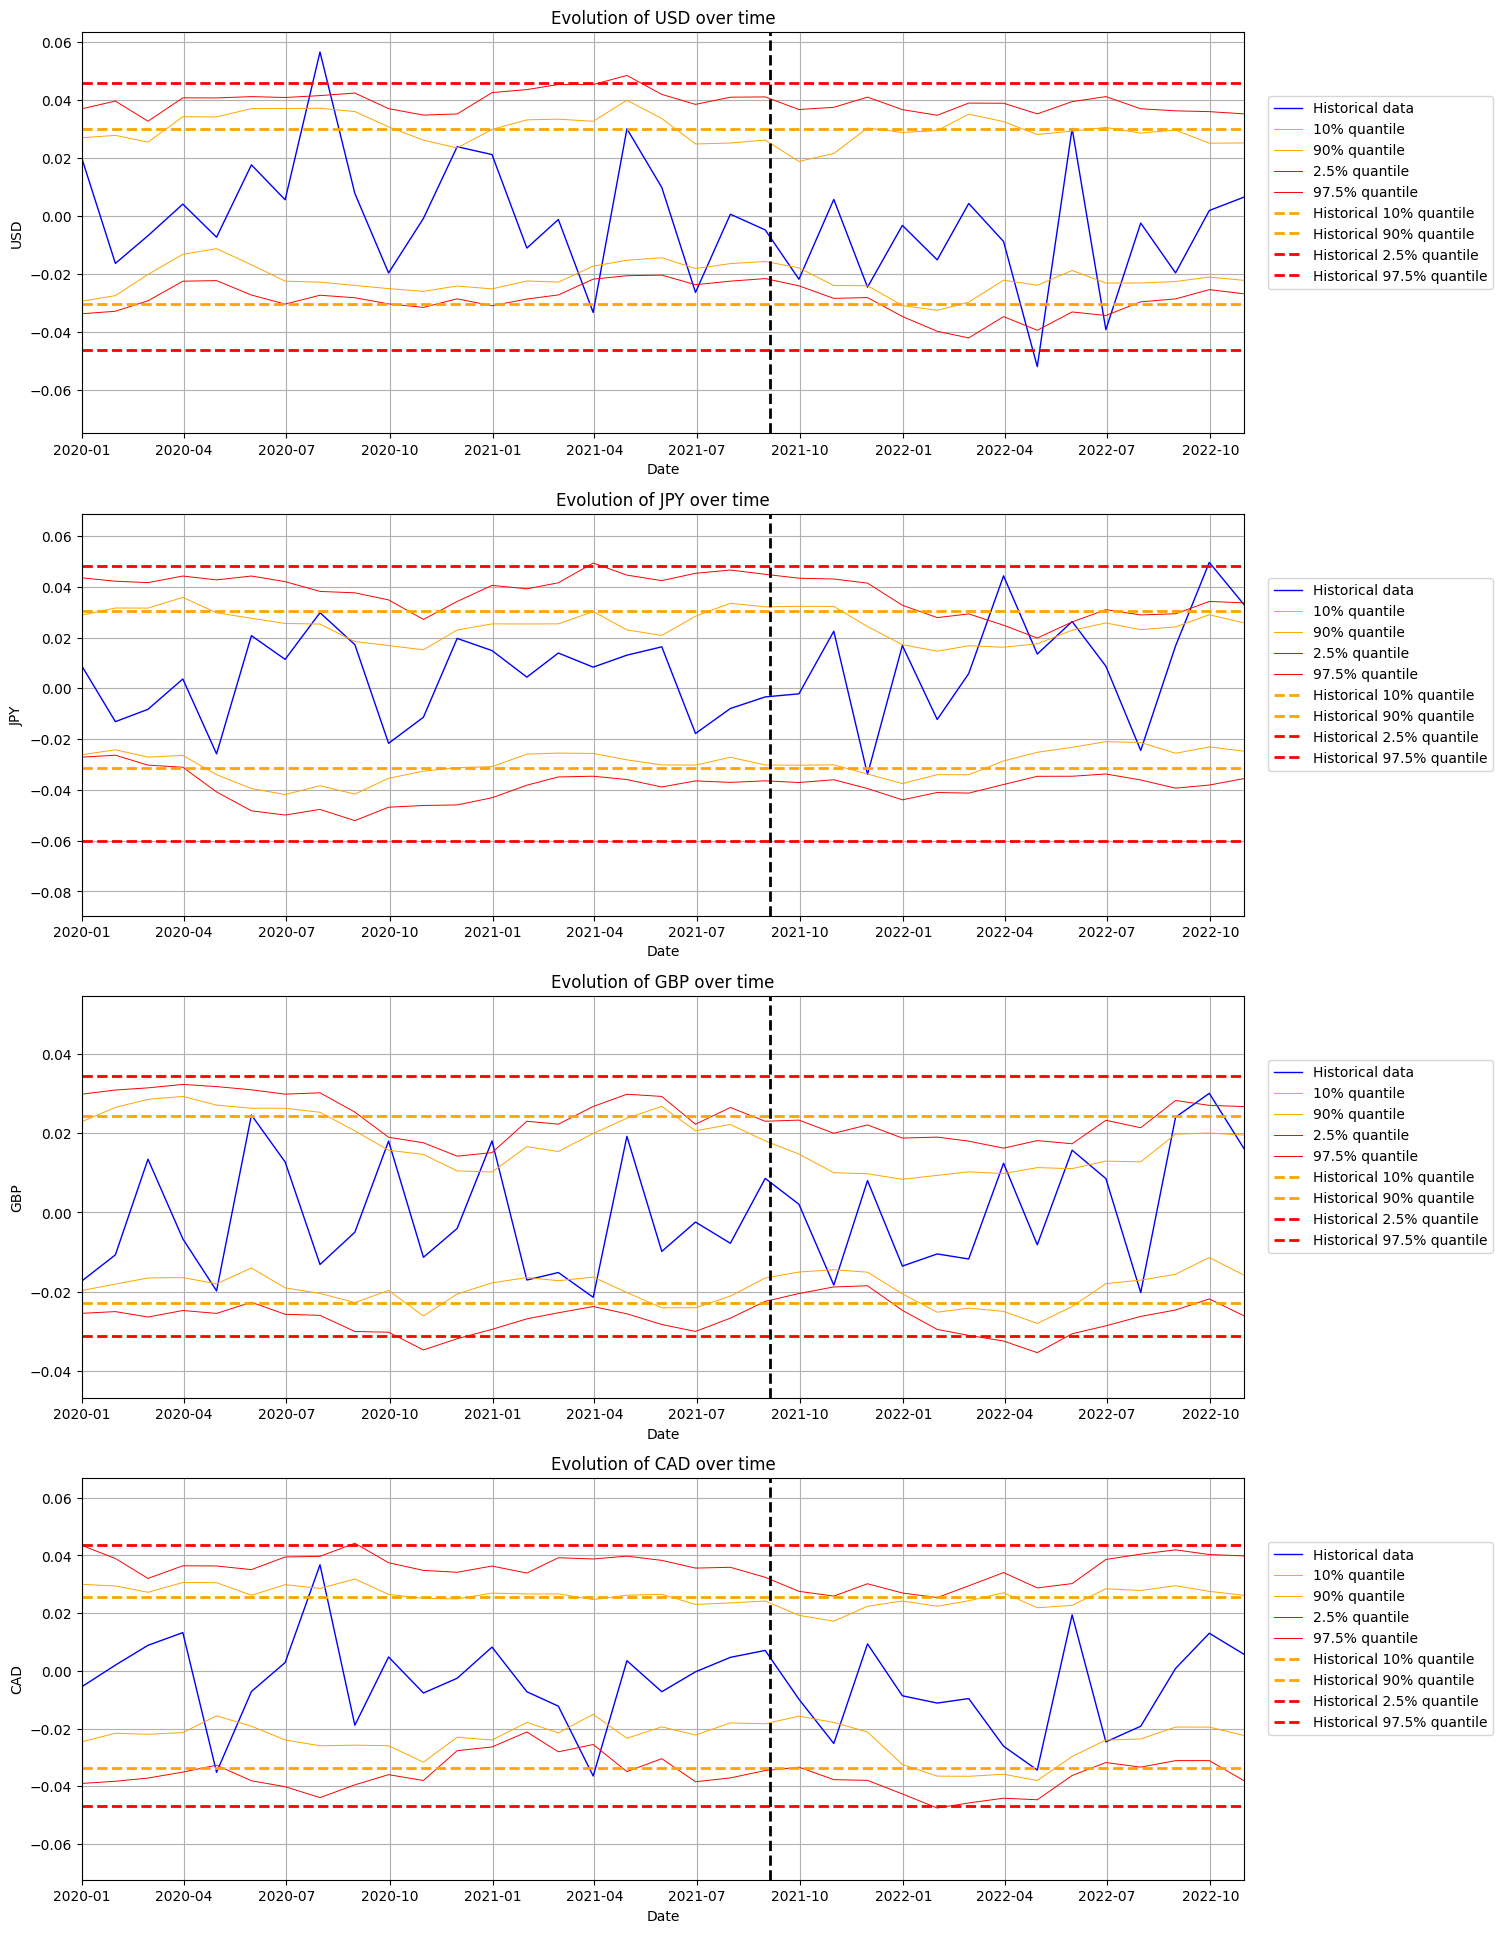

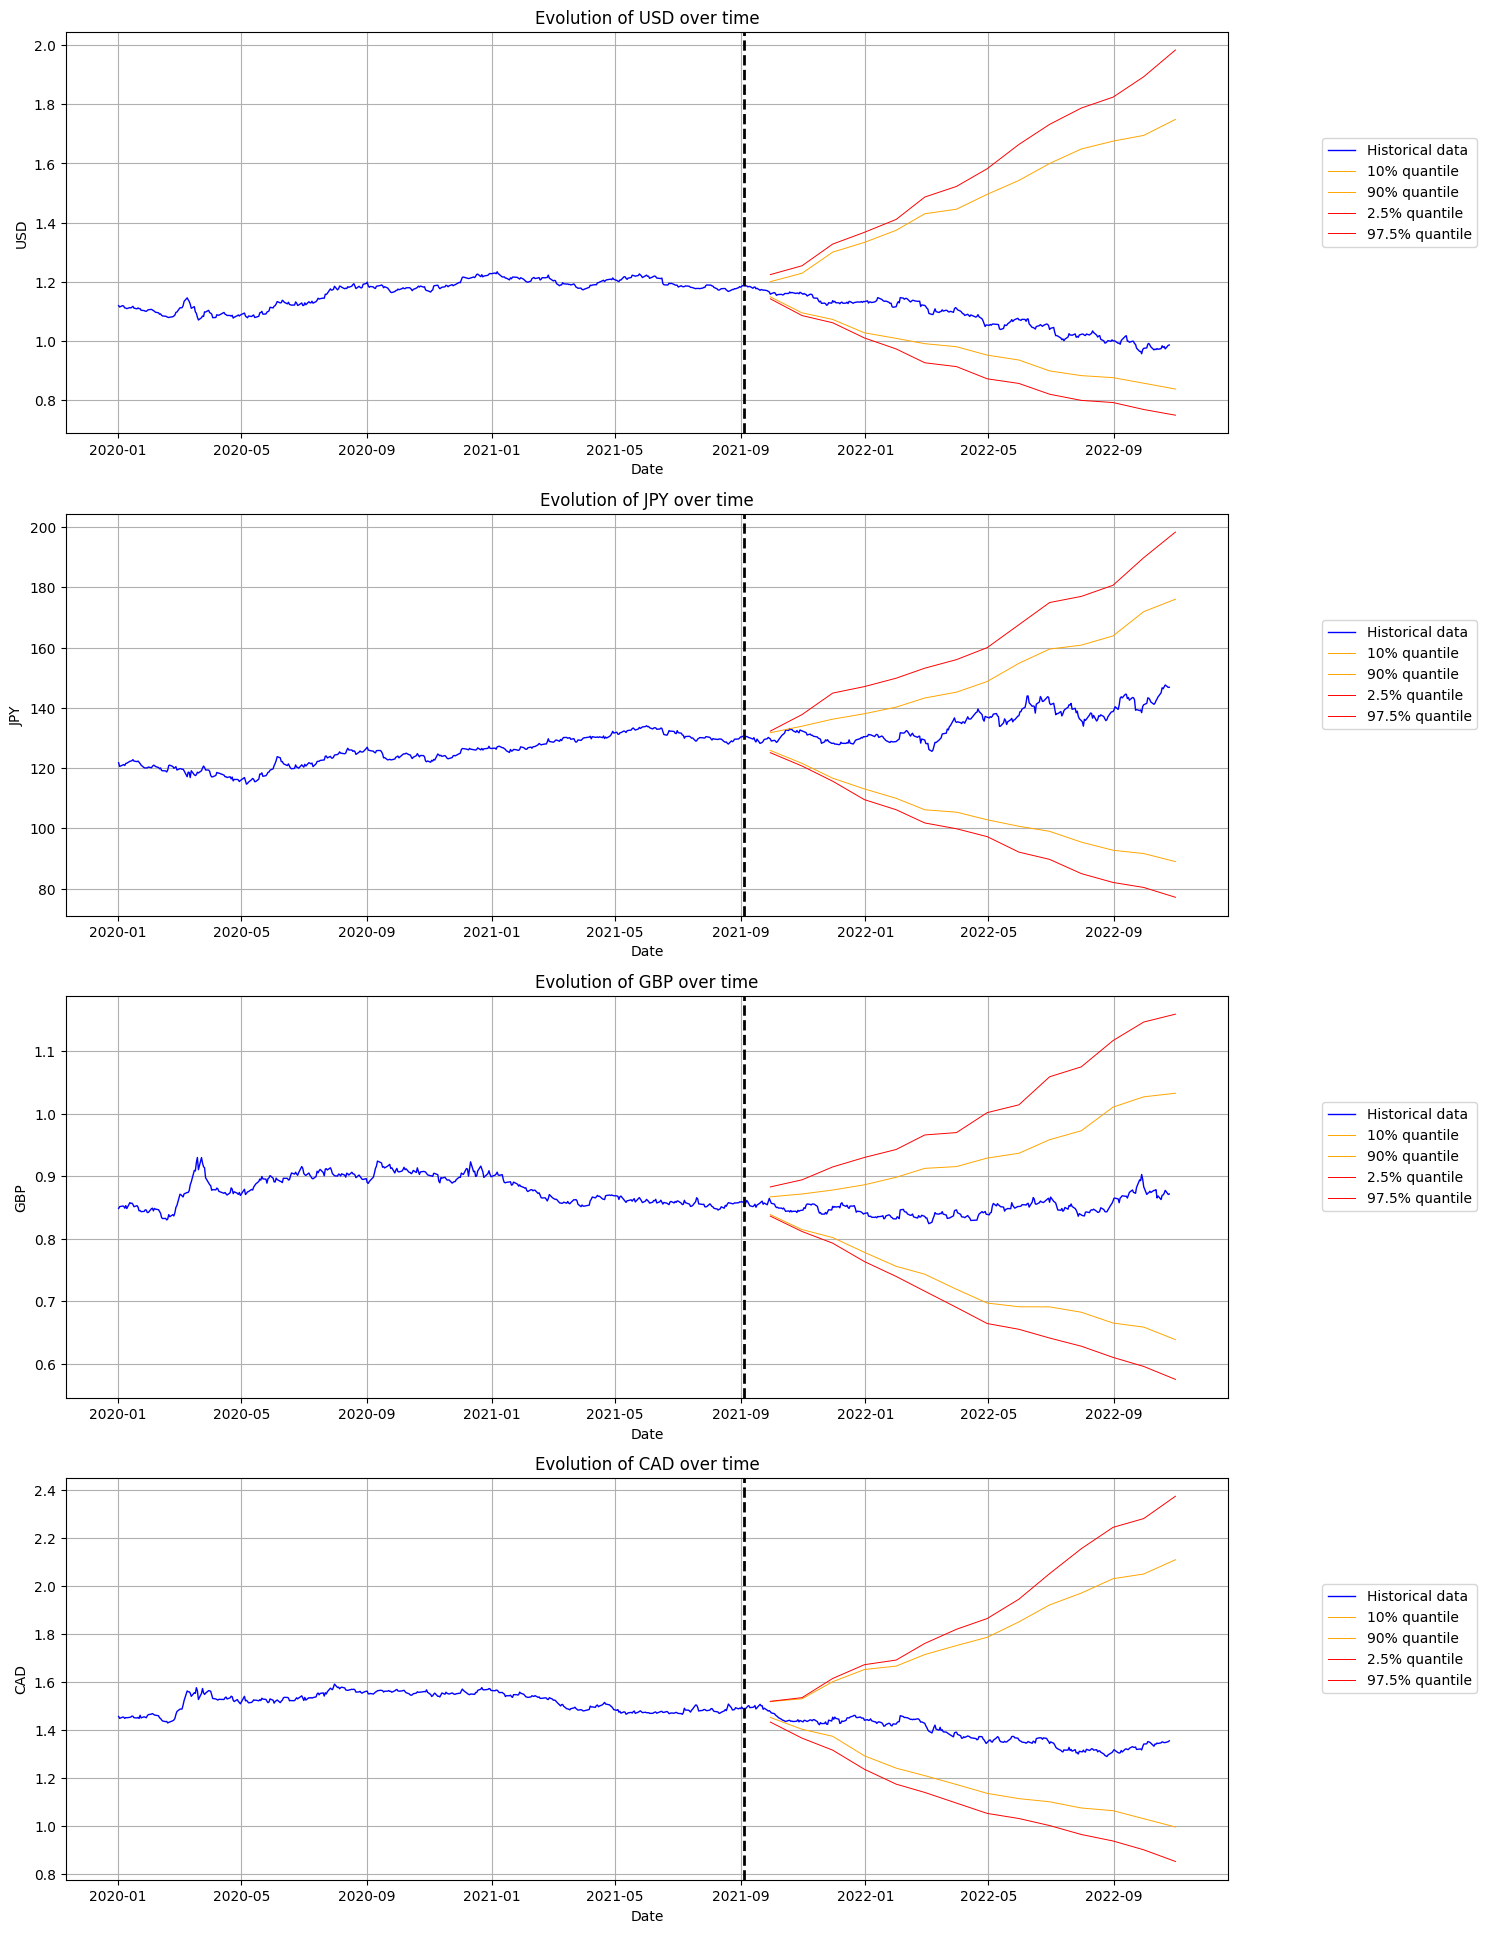

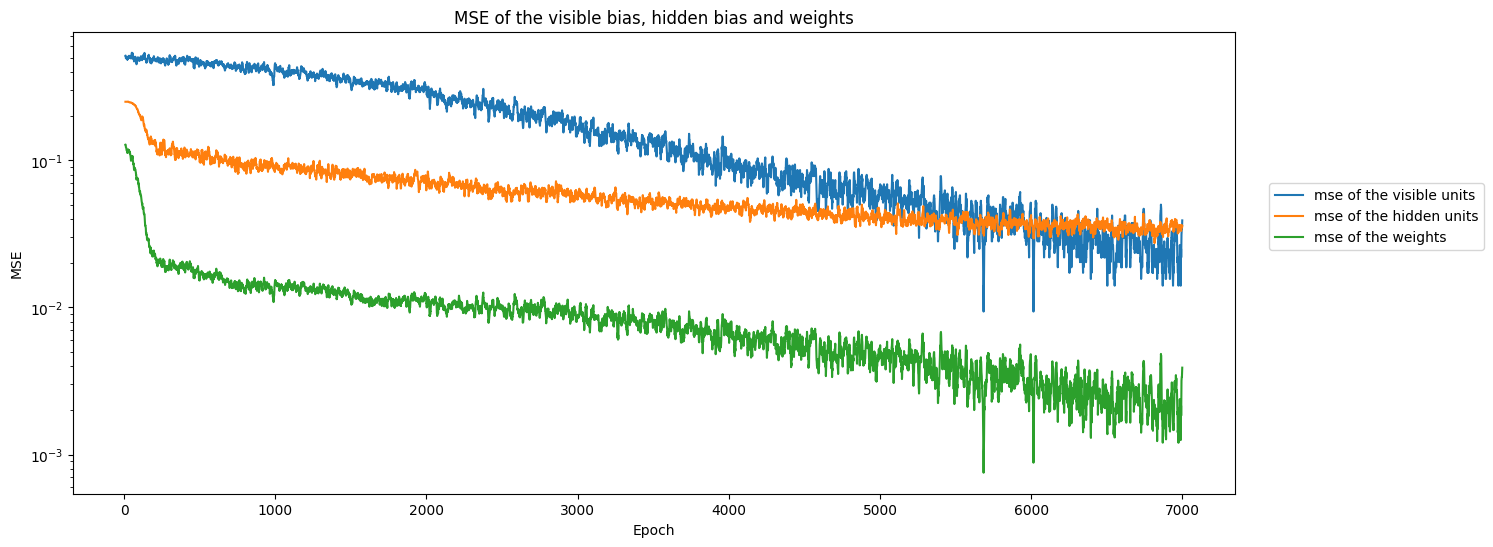

                 RBM
train      47.017779
generate  283.860014


In [5]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 500 # for the generation of sample
frequency = 'monthly'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=False)

### Annualy frequency

Pre-processing done


100%|██████████| 7000/7000 [00:51<00:00, 136.81it/s]


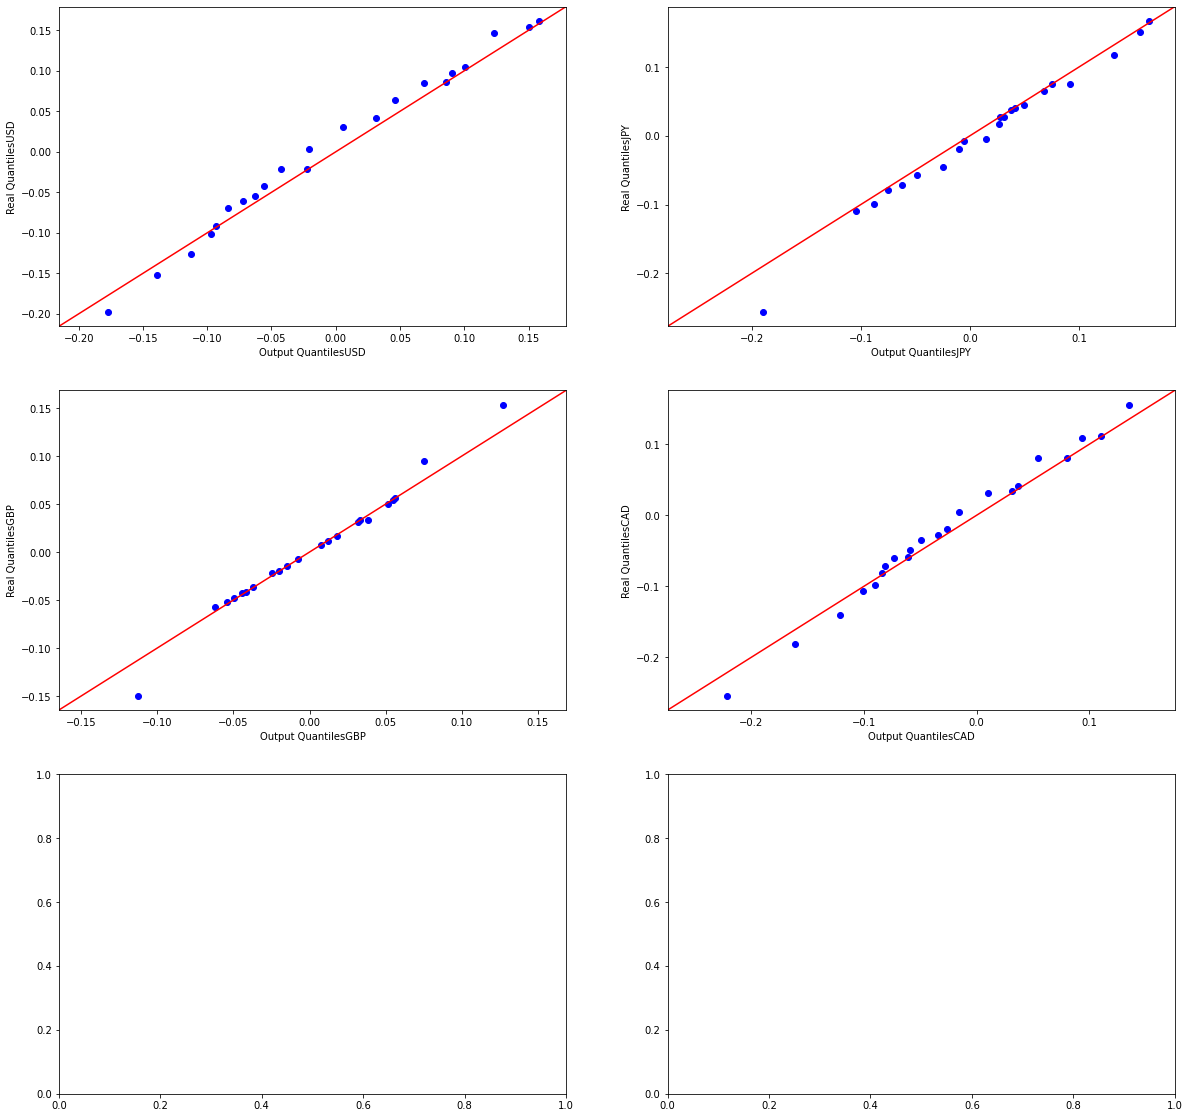

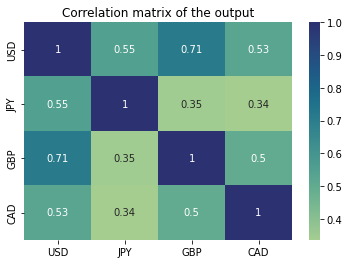

Correlation done
Train done


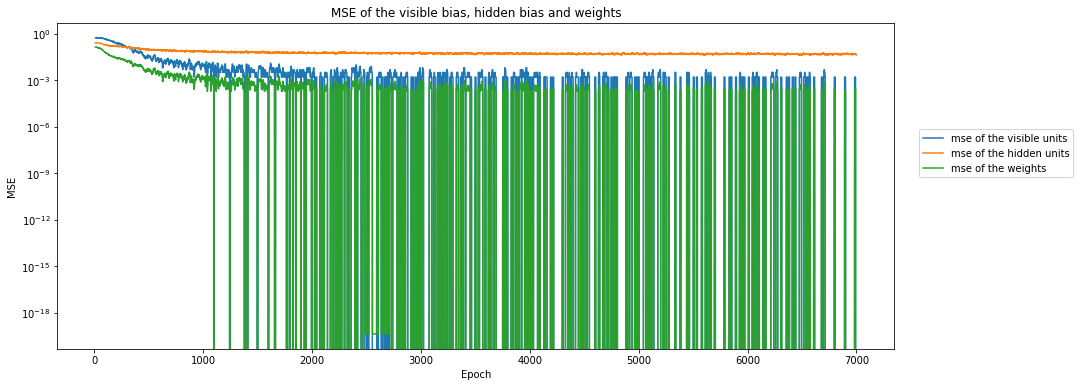

Time to generate the data: 36.95271372795105s


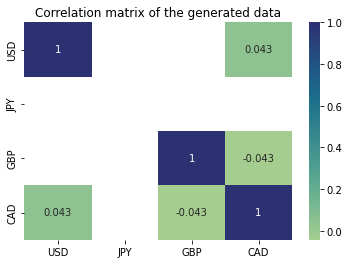

Correlation done
Quantiles done


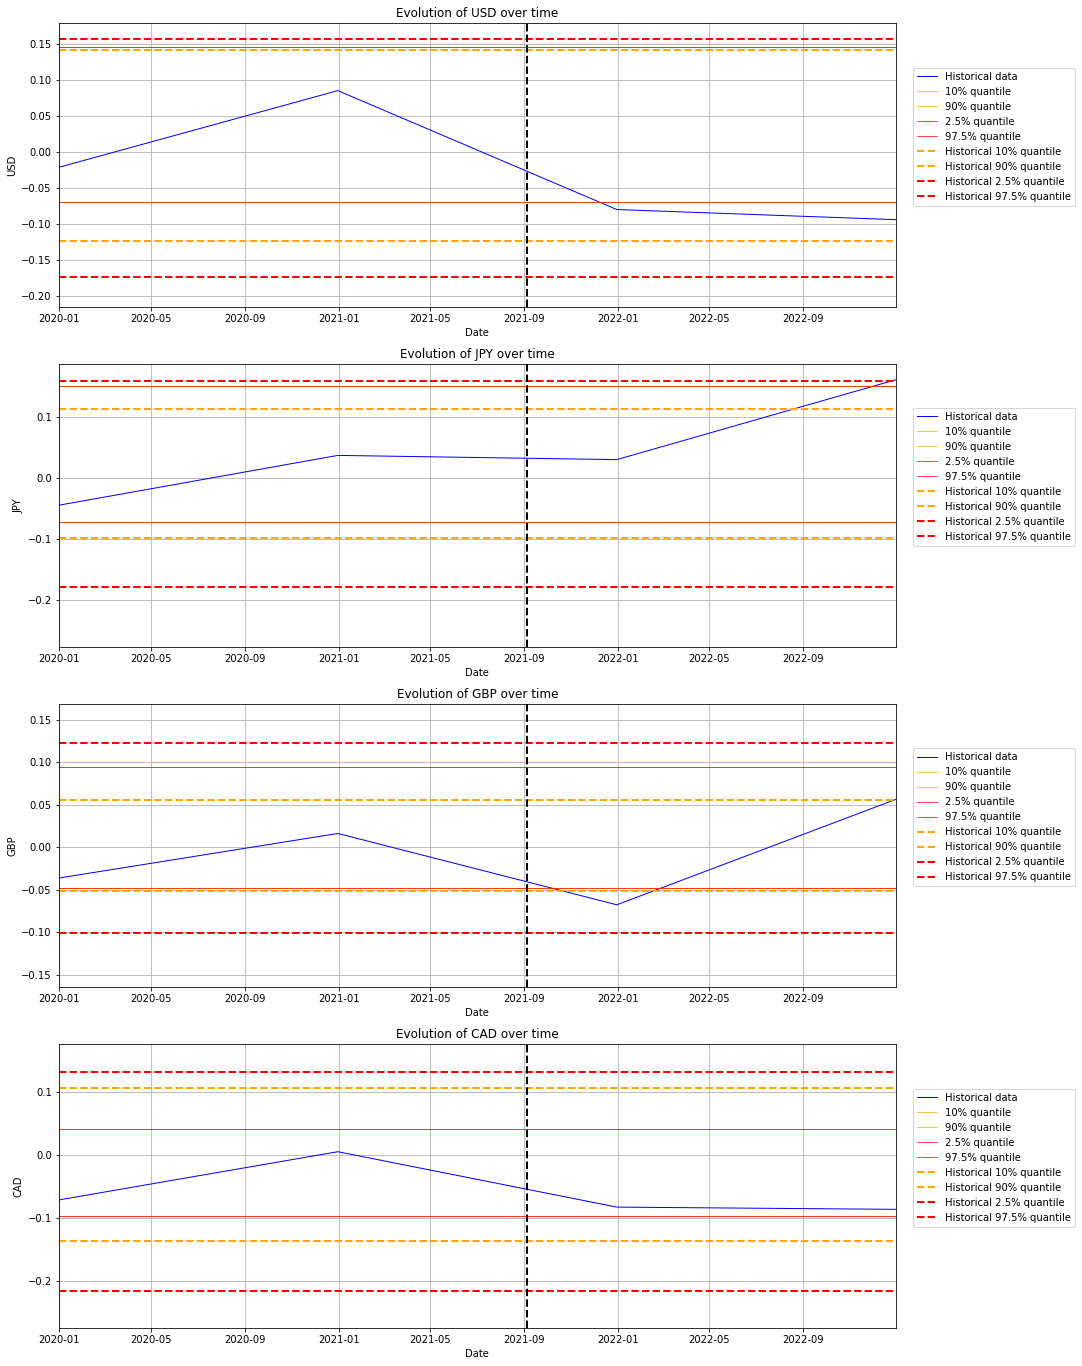

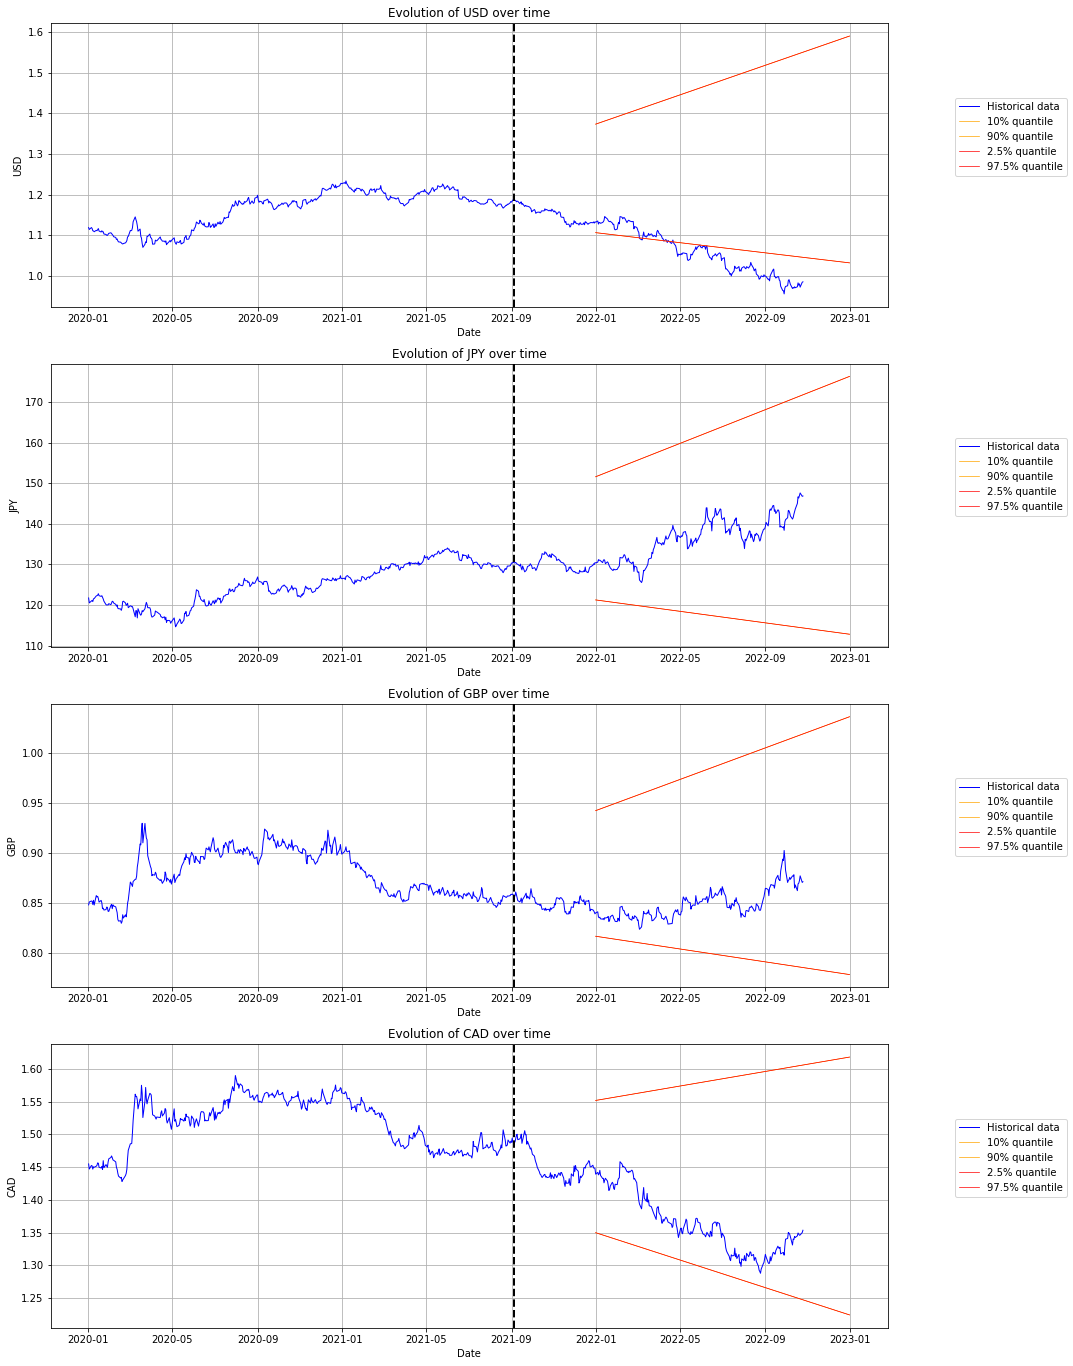

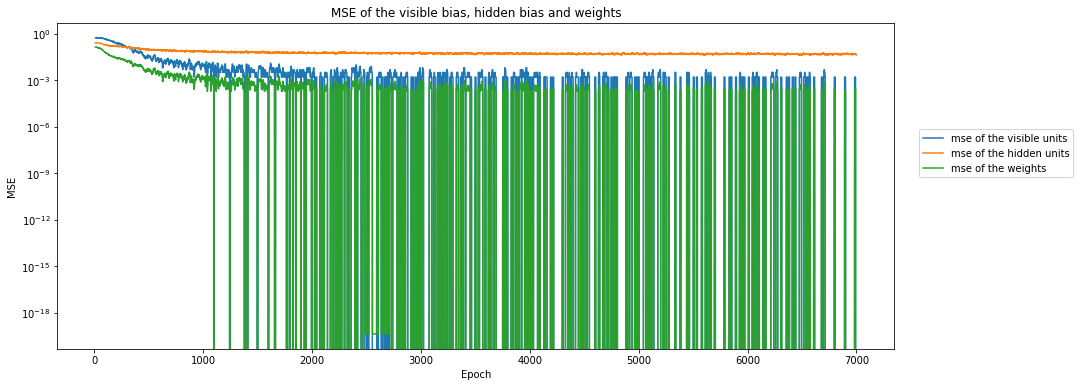

In [40]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 500 # for the generation of sample
frequency = 'annualy'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=True)

# Performance

In [6]:
ts.performance()

Bootstrap         RBM
train     0.023403   47.017779
generate  0.048742  283.860014

## Numba's Performances

Let's show how fast is numba with an estimation of pi using a monte carlo method.

In [1]:
import random

def monte_carlo_pi(n):
    count = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x*x + y*y < 1:
            count += 1
    return 4 * count / n

%timeit monte_carlo_pi(1000000)

154 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


154 ms for the pi estimation using monte carlo **without numba**

In [2]:
import numba
import random

@numba.jit(nopython=True)
def monte_carlo_pi_numba(n):
    count = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x*x + y*y < 1:
            count += 1
    return 4 * count / n

%timeit monte_carlo_pi_numba(1000000)

7.18 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


7.18 ms for the pi estimation using monte carlo **with numba**. Thus it is 21 times quicker **IN LOCAL**. We have almost the same result in Colab, with numba it is 25 times quicker.

![alternative text](./img/Numba.png)